<a href="https://colab.research.google.com/github/XTEP63/Time_Series/blob/main/Proyecto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![iteso](https://upload.wikimedia.org/wikipedia/en/5/5f/Western_Institute_of_Technology_and_Higher_Education_logo.png)

**Integrantes del equipo:**
- Francisco Javier Gonzalez Lazalde
- Maximiliano Aguayo Villanueva
- Esteban Javier Berumen Nieto
- Abdon Islas Leon

**Docente:** Daniel Nuño

**Fecha:** 2 Diciembre 2024

# **Índice de contenidos**
1. [Introducción](Introducción)
2. [Vector autoregression](#Vector-autoregression)
3. [Descarga de los datos](#Descarga-de-los-datos)
3. [Transfomraciones matemáticas](#Transfomraciones-matemáticas)
4. [Ajuste de los modelos](#Ajuste-de-los-modelos)
5. [Validación de resultados y elección del modelo](#Validación-de-resultados-y-elección-del-modelo)
6. [Pronosticos](#Pronosticos)
7. [Conclusión](#Conclusión)

## **Introducción**


En el análisis y pronóstico de series de tiempo, una de las aplicaciones más relevantes es la proyección del desempeño futuro de portafolios de inversión. Este proyecto se centra en explorar y aplicar modelos avanzados de series de tiempo para estimar los precios futuros de las acciones que conforman el índice de Precios y Cotizaciones (IPC). El objetivo principal es proporcionar un marco metodológico sólido para la construcción de un portafolio simulado y el pronóstico de su rendimiento a corto plazo.

El proyecto se estructura en varias etapas clave: recopilación de datos históricos de precios, limpieza y transformación de las series de tiempo, selección y ajuste de modelos avanzados, y validación de resultados. Finalmente, se utiliza una metodología jerárquica "bottoms-up" para consolidar los pronósticos a nivel sectorial y del portafolio total.

Entre los modelos considerados para este análisis se incluyen un modelo simple como línea base, ARIMA para capturar patrones de autocorrelación, ETS para modelar componentes de tendencia y estacionalidad, regresión dinámica para incorporar variables exógenas, y Vector Autoregression (VAR) para modelar relaciones entre múltiples series de tiempo. Este conjunto diverso de modelos permite una comparación exhaustiva de diferentes enfoques, facilitando la selección del más adecuado para cada acción basado en métricas de error cuantitativas.

El análisis culmina con un pronóstico a tres meses, proporcionando una visión anticipada del comportamiento del portafolio en función de las tendencias pasadas y el peso de cada acción en el índice. Los resultados obtenidos son fundamentales no solo para entender el comportamiento de las series de tiempo, sino también para la toma de decisiones estratégicas en la gestión de inversiones.

## **Vector autoregression - Teoría**

El modelo de **Vector Autoregression (VAR)** es una herramienta estadística que analiza y predice cómo varias variables cambian juntas a lo largo del tiempo. A diferencia de otros modelos más simples, el VAR considera cómo cada variable afecta a las demás y a sí misma en diferentes momentos.

### Conceptos básicos:

- **Estructura del modelo**: Cada variable se relaciona con sus valores anteriores y los de otras variables.
- **Igualdad**: Todas las variables se tratan de la misma manera, sin asumir que una causa a la otra.

Un ejemplo simple de VAR con dos variables (Y y X) se ve así:


\begin{aligned}
Y_t &= a_1 + b_{11}Y_{t-1} + b_{12}X_{t-1} + \epsilon_{1t} \\
X_t &= a_2 + b_{21}Y_{t-1} + b_{22}X_{t-1} + \epsilon_{2t}
\end{aligned}


Donde:

- $a_1$ y $a_2$ son puntos de inicio.
- $b_{ij}$ son números que muestran cómo los valores pasados afectan al presente.
- $ϵ_{1t}$ y $ϵ_{2t}$ representa errores o sorpresas en cada predicción.

### Ventajas:

Ayuda a entender cómo diferentes variables se influyen entre sí.
Permite analizar relaciones cambiantes entre múltiples series de datos en el tiempo.

### Desventajas:

Los datos deben tener ciertas características para que el modelo funcione bien.
Puede complicarse si se usan muchas variables o se mira muy atrás en el tiempo.

El VAR se usa mucho en economía y finanzas para entender cómo se relacionan cosas como las tasas de interés, la inflación y los precios de las acciones.

## **Librerias Implentadas**

In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
from scipy.stats import boxcox, shapiro
from sklearn.preprocessing import PowerTransformer
import matplotlib.pyplot as plt

## **Descarga de los datos**

In [2]:
portafolio = pd.read_excel("ipc_componentes.xlsx")
portafolio.head()

,nombre,ticker,peso,ticker yahoo,segmento
0,Alfa SA A,ALFA A,0.0129,ALFAA.MX,Materials
1,Alsea SA,ALSEA *,0.0113,ALSEA.MX,Consumer Discretionary
2,America Movil SAB de CV B,AMX B,0.0908,AMXB.MX,Communication Services
3,"Arca Continental, SAB de CV",AC *,0.0262,AC.MX,Consumer Staples
4,"Banco del Bajio, S.A.",BBAJIO O,0.0155,BBAJIOO.MX,Financials


In [3]:
ticker = yf.Tickers(portafolio['ticker yahoo'].tolist())
data = ticker.history(start= '2015-01-01', end= '2023-12-31', interval='1mo')['Close']

data.head()

[*********************100%***********************]  35 of 35 completed


Ticker,AC.MX,ALFAA.MX,ALSEA.MX,AMXB.MX,ASURB.MX,BBAJIOO.MX,BIMBOA.MX,BOLSAA.MX,CEMEXCPO.MX,CHDRAUIB.MX,...,MEGACPO.MX,OMAB.MX,ORBIA.MX,PE&OLES.MX,PINFRA.MX,Q.MX,RA.MX,TLEVISACPO.MX,VESTA.MX,WALMEX.MX
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,65.702621,24.689165,37.795326,11.671400,152.225342,NaN,34.200203,15.430017,11.531771,37.507206,...,38.958515,38.346146,33.284706,262.346100,130.751770,NaN,54.440792,88.730598,23.547869,22.750080
2015-02-01,70.285492,29.111107,43.193317,11.671400,159.254837,NaN,37.858749,16.780148,13.125944,44.206856,...,39.022575,39.573223,34.902493,281.710846,138.726151,NaN,55.739498,92.414070,23.328478,28.753899
2015-03-01,69.477196,27.682064,42.006321,11.124301,159.635437,NaN,38.791325,16.133083,12.536793,41.669647,...,42.517670,41.436153,32.001629,235.338303,126.094238,NaN,54.553112,91.677376,23.035957,30.059099
2015-04-01,69.892464,27.996632,43.400566,11.737049,168.668915,NaN,36.944118,18.360479,13.335612,41.570332,...,45.450417,42.735733,35.294956,230.718750,136.695755,NaN,61.762741,101.554527,23.328478,28.584152
2015-05-01,70.519691,27.223787,43.626667,11.744345,176.417755,NaN,37.374531,16.991690,12.993213,42.587978,...,46.048355,40.197918,37.479805,242.054352,130.000061,NaN,59.649693,105.901924,22.910900,30.507957


## **Pesos y Segmentos**

In [4]:

print(f"{'Ticker':<25} {'Ticker Yahoo':<15} {'Segmento':<30} {'Peso':<10}")
print("=" * 85)


for index, row in portafolio.iterrows():
    print(f"{row['ticker']:<25} {row['ticker yahoo']:<15} {row['segmento']:<30} {row['peso']:<10.4f}")


Ticker                    Ticker Yahoo    Segmento                       Peso      
ALFA A                    ALFAA.MX        Materials                      0.0129    
ALSEA *                   ALSEA.MX        Consumer Discretionary         0.0113    
AMX B                     AMXB.MX         Communication Services         0.0908    
AC *                      AC.MX           Consumer Staples               0.0262    
BBAJIO O                  BBAJIOO.MX      Financials                     0.0155    
CUERVO *                  CUERVO.MX       Materials                      0.0051    
BOLSA A                   BOLSAA.MX       Financials                     0.0049    
CEMEX CPO                 CEMEXCPO.MX     Materials                      0.0649    
KOF UBL                   KOFUBL.MX       Consumer Staples               0.0217    
VESTA *                   VESTA.MX        Industrials                    0.0164    
LIVEPOL C-1               LIVEPOLC-1.MX   Consumer Discretionary         0.0

## **Train/Test**

In [5]:
train = data.loc[:'2022-12-01']
test = data.loc['2023-01-01':]
horizon = len(test)
print(f'Longitud de Train{train.shape}')
print(f'Longitud de Test{test.shape}')

Longitud de Train(96, 35)
Longitud de Test(12, 35)


In [6]:
train.tail()

Ticker,AC.MX,ALFAA.MX,ALSEA.MX,AMXB.MX,ASURB.MX,BBAJIOO.MX,BIMBOA.MX,BOLSAA.MX,CEMEXCPO.MX,CHDRAUIB.MX,...,MEGACPO.MX,OMAB.MX,ORBIA.MX,PE&OLES.MX,PINFRA.MX,Q.MX,RA.MX,TLEVISACPO.MX,VESTA.MX,WALMEX.MX
Date,,,,,,,,,,,,,,,,,,,,,
2022-08-01,125.653061,11.681935,35.960003,15.888947,393.241547,31.970022,64.348740,32.173889,7.468695,56.151237,...,37.337002,114.007988,37.491348,165.589996,124.870308,81.147408,97.198341,24.065973,36.832081,60.717865
2022-09-01,132.854156,11.663712,35.556732,16.371164,364.940277,42.173584,68.770172,29.883965,6.958784,58.362064,...,35.852356,109.637718,33.428627,194.630005,120.814079,76.467598,101.443008,20.596834,37.288517,65.227440
2022-10-01,148.291687,11.991753,37.435387,17.357035,428.500702,46.135368,74.639488,31.758345,7.718651,78.347603,...,36.470963,136.733429,32.997391,222.009995,133.813965,71.484375,123.408043,19.904903,42.835152,70.585442
2022-11-01,147.137329,12.301570,38.163239,18.579897,440.969482,51.850594,79.556511,33.676933,8.818459,81.575806,...,43.302086,144.946091,37.422775,257.119995,153.584412,74.683937,125.883339,20.141865,42.755775,70.318016
2022-12-01,147.468277,11.326556,36.176388,17.252762,418.400360,50.767101,80.576431,33.358639,7.918616,81.213852,...,45.838348,129.654434,34.205212,238.179993,142.352448,79.271805,125.999512,16.776989,45.821808,64.403976


In [7]:
test.head()

Ticker,AC.MX,ALFAA.MX,ALSEA.MX,AMXB.MX,ASURB.MX,BBAJIOO.MX,BIMBOA.MX,BOLSAA.MX,CEMEXCPO.MX,CHDRAUIB.MX,...,MEGACPO.MX,OMAB.MX,ORBIA.MX,PE&OLES.MX,PINFRA.MX,Q.MX,RA.MX,TLEVISACPO.MX,VESTA.MX,WALMEX.MX
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-01,154.989136,12.420030,44.281162,18.105919,470.210754,62.561478,91.532082,36.152527,10.018250,90.741959,...,52.324825,148.883667,37.304504,266.190002,175.657791,95.637360,145.605392,21.838524,50.862404,68.770500
2023-02-01,144.603653,10.934730,39.835339,17.641422,482.771729,57.822224,85.403191,31.537308,9.098411,90.976738,...,41.561165,151.393341,37.791683,218.910004,170.572922,104.638412,135.650528,17.326744,52.578987,67.414734
2023-03-01,152.451065,10.433554,42.402508,18.485100,507.967377,54.216091,88.683037,34.065952,9.918267,100.759186,...,40.739307,177.926193,38.964916,268.200012,171.815445,105.778496,123.005905,18.094505,56.260208,67.321236
2023-04-01,160.261185,10.479475,47.635197,18.485100,474.671173,48.897865,94.479050,35.029667,10.808112,103.987389,...,43.231388,174.389587,41.162220,278.000000,178.840622,109.768738,117.626358,17.345699,56.359436,67.760689
2023-05-01,170.277573,10.811430,50.605637,18.485100,457.391785,46.019573,92.853813,32.881203,10.618145,90.608253,...,36.320728,161.719727,37.203979,269.970001,164.580017,109.915848,123.139954,16.075577,55.657761,63.646515


## **Transfomraciones matemáticas**

In [8]:
def aplicar_boxcox(dataframe):
    resultado = dataframe.copy()
    lambdas = {}

    for columna in resultado.columns:
        serie = resultado[columna].dropna()

        if (serie <= 0).any():
            print(f"La columna {columna} tiene valores no positivos y no puede transformarse con Box-Cox.")
            continue

        stat, p_value = shapiro(serie)
        if p_value < 0.05:
            transformed_data, lambda_val = boxcox(serie)
            resultado.loc[serie.index, columna] = transformed_data
            lambdas[columna] = lambda_val
        else:
            lambdas[columna] = None

    return resultado, lambdas

In [9]:
data_boxcox, lambdas = aplicar_boxcox(data)

print("DataFrame transformado:")
display(data_boxcox)
print("\nLambdas aplicadas:")
print(lambdas)

DataFrame transformado:


Ticker,AC.MX,ALFAA.MX,ALSEA.MX,AMXB.MX,ASURB.MX,BBAJIOO.MX,BIMBOA.MX,BOLSAA.MX,CEMEXCPO.MX,CHDRAUIB.MX,...,MEGACPO.MX,OMAB.MX,ORBIA.MX,PE&OLES.MX,PINFRA.MX,Q.MX,RA.MX,TLEVISACPO.MX,VESTA.MX,WALMEX.MX
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,0.632167,3.272514,122.749443,1.473715,3.659535,NaN,0.555395,24.433218,6.907533,0.833414,...,38.958515,1.934555,2.990080,2.316007,130.751770,NaN,4.499305,13.503229,0.738085,5.662532
2015-02-01,0.632253,3.444293,148.577576,1.473715,3.682524,NaN,0.555557,27.258522,7.738652,0.835462,...,39.022575,1.941994,3.024236,2.324486,138.726151,NaN,4.529063,13.780052,0.737946,6.389074
2015-03-01,0.632239,3.391774,142.773978,1.457991,3.683736,NaN,0.555592,25.896613,7.434726,0.834771,...,42.517670,1.952692,2.961673,2.302623,126.094238,NaN,4.501905,13.725201,0.737756,6.533610
2015-04-01,0.632246,3.403561,149.597869,1.475530,3.711572,NaN,0.555521,30.642930,7.845954,0.834742,...,45.450417,1.959766,3.032262,2.300120,136.695755,NaN,4.659059,14.440697,0.737946,6.369965
2015-05-01,0.632257,3.374364,150.713325,1.475730,3.734135,NaN,0.555538,27.706828,7.670494,0.835032,...,46.048355,1.945658,3.075227,2.306142,130.000061,NaN,4.614871,14.742932,0.737673,6.582370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,0.632806,2.460779,233.262039,1.614235,4.161202,3.733800,0.556169,62.596559,7.974351,0.841111,...,39.013447,2.213299,3.081170,2.305754,157.880508,9.664303,5.469557,5.040874,0.746158,9.343107
2023-09-01,0.632790,2.467153,252.168259,1.542866,4.124029,3.749849,0.556169,59.113525,6.809878,0.841400,...,36.394905,2.207774,3.047049,2.284888,150.550308,9.587931,5.462617,3.971559,0.745759,9.251159
2023-10-01,0.632796,2.452525,231.163968,1.540129,4.083060,3.754627,0.556114,48.721519,6.509748,0.841522,...,33.417137,2.165061,2.894146,2.281167,144.053970,10.035604,5.580636,3.327076,0.745693,9.174831



Lambdas aplicadas:
{'AC.MX': np.float64(-1.5797339416444862), 'ALFAA.MX': np.float64(0.012694602802523918), 'ALSEA.MX': np.float64(1.4230072694256437), 'AMXB.MX': np.float64(-0.45874791026095585), 'ASURB.MX': np.float64(-0.13368013816861413), 'BBAJIOO.MX': np.float64(-0.01753455762546532), 'BIMBOA.MX': np.float64(-1.7973728745137418), 'BOLSAA.MX': np.float64(1.2657201246012926), 'CEMEXCPO.MX': np.float64(0.7406128603375972), 'CHDRAUIB.MX': np.float64(-1.1834288251659193), 'CUERVO.MX': np.float64(0.3338837319407495), 'FEMSAUBD.MX': np.float64(-0.009234464277520558), 'GAPB.MX': np.float64(0.04563290215053408), 'GCARSOA1.MX': np.float64(-0.9161845489578045), 'GCC.MX': np.float64(0.8592711703375123), 'GENTERA.MX': None, 'GFINBURO.MX': None, 'GFNORTEO.MX': np.float64(-0.5770353812747745), 'GMEXICOB.MX': np.float64(-0.5279215737878574), 'GRUMAB.MX': np.float64(-0.13123435554756888), 'KIMBERA.MX': np.float64(-0.33669246220261473), 'KOFUBL.MX': np.float64(-0.8464400613009115), 'LABB.MX': np.f

## **Diferenciacion**

In [10]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

def aplicar_diferenciacion(dataframe, significancia=0.05):
    resultado = dataframe.copy()
    diferenciaciones = {}

    for columna in resultado.columns:
        serie = resultado[columna].dropna()

        adf_stat, p_value, *_ = adfuller(serie)

        diferencia_nivel = 0
        while p_value >= significancia:
            diferencia_nivel += 1
            serie = serie.diff().dropna()
            adf_stat, p_value, *_ = adfuller(serie)

        resultado.loc[serie.index, columna] = serie
        diferenciaciones[columna] = diferencia_nivel

    return resultado, diferenciaciones

In [11]:
data_diferenciada, niveles_diferenciacion = aplicar_diferenciacion(data_boxcox)
data_diff_cols = data_diferenciada.copy()

print("DataFrame diferenciado:")
display(data_diferenciada)
print("\nNiveles de diferenciación aplicados:")
print(niveles_diferenciacion)


DataFrame diferenciado:


Ticker,AC.MX,ALFAA.MX,ALSEA.MX,AMXB.MX,ASURB.MX,BBAJIOO.MX,BIMBOA.MX,BOLSAA.MX,CEMEXCPO.MX,CHDRAUIB.MX,...,MEGACPO.MX,OMAB.MX,ORBIA.MX,PE&OLES.MX,PINFRA.MX,Q.MX,RA.MX,TLEVISACPO.MX,VESTA.MX,WALMEX.MX
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,0.632167,3.272514,122.749443,1.473715,3.659535,NaN,5.553945e-01,24.433218,6.907533,0.833414,...,38.958515,1.934555,2.990080,2.316007,130.751770,NaN,4.499305,13.503229,0.738085,5.662532
2015-02-01,0.000086,0.171779,25.828133,0.000000,0.022990,NaN,1.624578e-04,2.825304,7.738652,0.835462,...,0.064060,0.007438,0.034157,0.008479,138.726151,NaN,0.029758,0.276823,-0.000139,0.726542
2015-03-01,-0.000014,-0.052519,-5.803598,-0.015725,0.001212,NaN,3.469017e-05,-1.361909,7.434726,-0.002739,...,3.495094,0.010698,-0.062563,-0.021863,126.094238,NaN,-0.027158,-0.054851,-0.000190,0.144536
2015-04-01,0.000007,0.011787,6.823891,0.017539,0.027836,NaN,-7.111570e-05,4.746317,7.845954,0.000662,...,2.932747,0.007074,0.070589,-0.002502,136.695755,NaN,0.157155,0.715496,0.000190,-0.163645
2015-05-01,0.000011,-0.029197,1.115456,0.000201,0.022563,NaN,1.745201e-05,-2.936102,7.670494,0.000318,...,0.597939,-0.014108,0.042965,0.006022,130.000061,NaN,-0.044189,0.302234,-0.000273,0.212406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,-0.000003,0.093586,10.652004,0.006228,-0.010312,0.051743,-1.269114e-05,-3.262197,7.974351,-0.000143,...,-1.124935,0.005999,-0.001501,0.000788,157.880508,0.286769,-0.043480,-0.489170,0.000175,-0.158491
2023-09-01,-0.000017,0.006374,18.906220,-0.071369,-0.037172,0.016050,-4.688355e-07,-3.483034,6.809878,0.000407,...,-2.618542,-0.005525,-0.034121,-0.020866,150.550308,-0.076372,-0.006941,-1.069316,-0.000399,-0.091949
2023-10-01,0.000007,-0.014628,-21.004290,-0.002737,-0.040969,0.004778,-5.478303e-05,-10.392007,6.509748,-0.000168,...,-2.977768,-0.042713,-0.152904,-0.003720,144.053970,0.447673,0.118019,-0.644483,-0.000065,-0.076328



Niveles de diferenciación aplicados:
{'AC.MX': 1, 'ALFAA.MX': 1, 'ALSEA.MX': 1, 'AMXB.MX': 1, 'ASURB.MX': 1, 'BBAJIOO.MX': 1, 'BIMBOA.MX': 1, 'BOLSAA.MX': 1, 'CEMEXCPO.MX': 0, 'CHDRAUIB.MX': 2, 'CUERVO.MX': 1, 'FEMSAUBD.MX': 1, 'GAPB.MX': 1, 'GCARSOA1.MX': 1, 'GCC.MX': 1, 'GENTERA.MX': 1, 'GFINBURO.MX': 1, 'GFNORTEO.MX': 1, 'GMEXICOB.MX': 1, 'GRUMAB.MX': 1, 'KIMBERA.MX': 1, 'KOFUBL.MX': 1, 'LABB.MX': 0, 'LACOMERUBC.MX': 1, 'LIVEPOLC-1.MX': 1, 'MEGACPO.MX': 1, 'OMAB.MX': 1, 'ORBIA.MX': 1, 'PE&OLES.MX': 1, 'PINFRA.MX': 0, 'Q.MX': 1, 'RA.MX': 1, 'TLEVISACPO.MX': 1, 'VESTA.MX': 1, 'WALMEX.MX': 1}


## **Formato y Elimanación de Na**

### **Datos sin Boxcox ni Diferenciación**

In [12]:
data.index = data.index.strftime('%Y-%m')
data.index = pd.to_datetime(data.index)
data = data.melt(ignore_index=False)
df = pd.DataFrame({"ds": data.index,
                   "y": data['value'],
                   "unique_id": data['Ticker']})
df.reset_index(drop=True, inplace=True)
df.dropna(inplace=True)
df.head()

,ds,y,unique_id
0,2015-01-01,65.702621,AC.MX
1,2015-02-01,70.285492,AC.MX
2,2015-03-01,69.477196,AC.MX
3,2015-04-01,69.892464,AC.MX
4,2015-05-01,70.519691,AC.MX


### **Datos con Boxcox**

In [13]:
data_boxcox.index = data_boxcox.index.strftime('%Y-%m')
data_boxcox.index = pd.to_datetime(data_boxcox.index)
data_boxcox = data_boxcox.melt(ignore_index=False)
df_boxcox = pd.DataFrame({"ds": data_boxcox.index,
                   "y": data_boxcox['value'],
                   "unique_id": data_boxcox['Ticker']})
df_boxcox.reset_index(drop=True, inplace=True)
df_boxcox.dropna(inplace=True)
df_boxcox.head()

,ds,y,unique_id
0,2015-01-01,0.632167,AC.MX
1,2015-02-01,0.632253,AC.MX
2,2015-03-01,0.632239,AC.MX
3,2015-04-01,0.632246,AC.MX
4,2015-05-01,0.632257,AC.MX


### **Datos con Boxcox y Diferenciación**

In [14]:
data_diferenciada.index = data_diferenciada.index.strftime('%Y-%m')
data_diferenciada.index = pd.to_datetime(data_diferenciada.index)
data_diferenciada = data_diferenciada.melt(ignore_index=False)
df_diff = pd.DataFrame({"ds": data_diferenciada.index,
                   "y": data_diferenciada['value'],
                   "unique_id": data_diferenciada['Ticker']})
df_diff.reset_index(drop=True, inplace=True)
df_diff.dropna(inplace=True)
df_diff.head()

,ds,y,unique_id
0,2015-01-01,0.632167,AC.MX
1,2015-02-01,0.000086,AC.MX
2,2015-03-01,-0.000014,AC.MX
3,2015-04-01,0.000007,AC.MX
4,2015-05-01,0.000011,AC.MX


## **Modelos**

### **Modelo simple**

In [15]:
from statsforecast import StatsForecast
from statsforecast.models import SeasonalNaive
from sklearn.metrics import mean_squared_error

c:\Users\esteb\.conda\envs\ITESO_1\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
def revertir_boxcox(predicciones, lambda_val):
    if lambda_val is None:
        return predicciones

    if lambda_val == 0:
        return np.exp(predicciones)

    return (predicciones * lambda_val + 1) ** (1 / lambda_val)


In [17]:
model = SeasonalNaive(season_length=12)

In [18]:
resultados_modelos = {}

In [19]:
todas_predicciones_revertidas = pd.DataFrame()

In [20]:
pesos = portafolio.set_index("ticker yahoo")["peso"].to_dict()

In [21]:
tickers = df_boxcox["unique_id"].unique()

In [22]:
pred = pd.DataFrame(columns=['unique_id', 'pred'] )

In [23]:
for ticker in tickers:
    df_ticker = df_boxcox[df_boxcox["unique_id"] == ticker].copy()

    train = df_ticker[df_ticker["ds"] <= '2022-12-31']
    test = df_ticker[df_ticker["ds"] >= '2023-01-01']

    sf = StatsForecast(df=train, models=[model], freq='M')

    predicciones = sf.forecast(h=len(test))

    lambda_val = lambdas.get(ticker, None)
    predicciones_revertidas = revertir_boxcox(predicciones["SeasonalNaive"], lambda_val)

    predicciones_df = pd.DataFrame({
        'unique_id': [ticker] * len(test),
        'pred': predicciones_revertidas,
    })

    pred = pd.concat([pred, predicciones_df], axis=0, ignore_index=True)

    mse = mean_squared_error(test["y"], predicciones_revertidas)

    resultados_modelos[ticker] = {"SeasonalNaive_MSE": mse}

c:\Users\esteb\.conda\envs\ITESO_1\lib\site-packages\statsforecast\core.py:476: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(
c:\Users\esteb\.conda\envs\ITESO_1\lib\site-packages\statsforecast\core.py:476: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(
c:\Users\esteb\.conda\envs\ITESO_1\lib\site-packages\utilsforecast\processing.py:384: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
c:\Users\esteb\.conda\envs\ITESO_1\lib\site-pac

In [24]:
resultados_df = pd.DataFrame(resultados_modelos).T
resultados_df

,SeasonalNaive_MSE
AC.MX,16481.689392
ALFAA.MX,105.492647
ALSEA.MX,28419.665396
AMXB.MX,252.199800
ASURB.MX,149855.450561
BBAJIOO.MX,1270.103346
BIMBOA.MX,4473.739331
BOLSAA.MX,1031.031067
CEMEXCPO.MX,8.980694
CHDRAUIB.MX,3556.692678


In [25]:
pred

,unique_id,pred
0,AC.MX,108.967522
1,AC.MX,120.676102
2,AC.MX,120.792198
3,AC.MX,115.647934
4,AC.MX,122.574722
...,...,...
415,WALMEX.MX,60.717865
416,WALMEX.MX,65.227440
417,WALMEX.MX,70.585442
418,WALMEX.MX,70.318016


In [26]:
def graficar_predicciones_vs_reales_statsforecast(nombre_accion, predicciones, reales):
    """
    Grafica las predicciones frente a los valores reales para una acción específica.

    Args:
        nombre_accion (str): Nombre de la acción a graficar.
        predicciones (pd.DataFrame): DataFrame con las predicciones que contiene las columnas 'unique_id' y 'pred'.
        reales (pd.DataFrame): DataFrame con los valores reales que contiene las columnas 'unique_id', 'ds', y 'y'.
    """
    # Filtrar datos para la acción seleccionada
    predicciones_accion = predicciones[predicciones['unique_id'] == nombre_accion]
    reales_accion = reales[reales['unique_id'] == nombre_accion]

    if predicciones_accion.empty or reales_accion.empty:
        print(f"No hay datos para la acción '{nombre_accion}'.")
        return

    # Asegurar que las predicciones y los reales estén alineados por fecha
    reales_accion = reales_accion.sort_values(by='ds')
    predicciones_accion = predicciones_accion.sort_values(by='unique_id')

    # Tomar solo las fechas coincidentes
    fechas_comunes = reales_accion['ds'].iloc[:len(predicciones_accion)].values
    reales_accion = reales_accion[reales_accion['ds'].isin(fechas_comunes)]
    predicciones_accion['ds'] = fechas_comunes

    # Graficar
    plt.figure(figsize=(12, 6))
    plt.plot(reales_accion['ds'], reales_accion['y'], label='Valores Reales', marker='o')
    plt.plot(predicciones_accion['ds'], predicciones_accion['pred'], label='Predicciones', linestyle='--', marker='x')

    plt.title(f"Predicciones vs Valores Reales para {nombre_accion}")
    plt.xlabel("Fecha")
    plt.ylabel("Valor")
    plt.legend()
    plt.grid(True)
    plt.show()

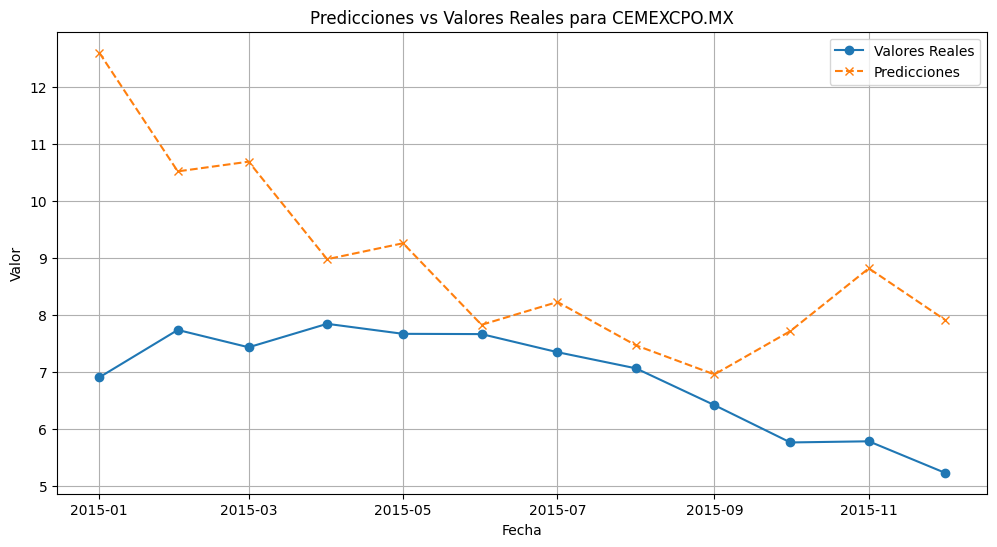

In [27]:
nombre_accion = 'CEMEXCPO.MX'  # Sustituir por el nombre de la acción deseada
graficar_predicciones_vs_reales_statsforecast(nombre_accion, pred, df_boxcox)

### **Modelo ARIMA**

In [28]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA
from statsforecast.arima import arima_string

from sklearn import metrics
import numpy as np

In [29]:
train = df[df.ds<'2022-12-31']
test = df[df.ds>='2023-01-01']

In [30]:
season_length = 12 # Monthly data
horizon = len(test['ds'].unique()) # number of predictions

models = [AutoARIMA(season_length=season_length)]

In [31]:
sf = StatsForecast(df=train,
                   models=models,
                   freq='MS',
                   n_jobs=-1)

c:\Users\esteb\.conda\envs\ITESO_1\lib\site-packages\statsforecast\core.py:476: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(


In [32]:
sf.fit()

c:\Users\esteb\.conda\envs\ITESO_1\lib\site-packages\statsforecast\core.py:476: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(


StatsForecast(models=[AutoARIMA])

In [33]:
test_hat = sf.forecast(fitted = True, h = horizon)
train_hat = sf.forecast_fitted_values()
test_hat.head()

c:\Users\esteb\.conda\envs\ITESO_1\lib\site-packages\statsforecast\core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
c:\Users\esteb\.conda\envs\ITESO_1\lib\site-packages\statsforecast\core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


,ds,AutoARIMA
unique_id,,
AC.MX,2023-01-01,147.468277
AC.MX,2023-02-01,147.468277
AC.MX,2023-03-01,147.468277
AC.MX,2023-04-01,147.468277
AC.MX,2023-05-01,147.468277


In [34]:
def model_evaluation(y_true, y_pred, stocks):
    errors_df = pd.DataFrame(columns=['MSE'], index=stocks)
    
    def mean_squared_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean((y_true - y_pred) ** 2)

    for stock in stocks:
        y_true_stock = y_true[y_true['unique_id'] == stock]['y']
        y_pred_stock = y_pred[y_pred.index == stock]['AutoARIMA']
        
        mse_score = mean_squared_error(y_true_stock, y_pred_stock)
        print(f"MSE score for {stock}: {mse_score}")
        
        # Guardar el resultado en el DataFrame
        errors_df.loc[stock, 'MSE'] = mse_score

    return errors_df


In [35]:
errors_df = model_evaluation(test, test_hat, test['unique_id'].unique())

MSE score for AC.MX: 242.33195245879082
MSE score for ALFAA.MX: 0.962935300150472
MSE score for ALSEA.MX: 357.30566099499873
MSE score for AMXB.MX: 2.723179746136113
MSE score for ASURB.MX: 2466.878381260826
MSE score for BBAJIOO.MX: 179.45740517531362
MSE score for BIMBOA.MX: 243.36502912210642
MSE score for BOLSAA.MX: 6.373515753936787
MSE score for CEMEXCPO.MX: 13.636885264023173
MSE score for CHDRAUIB.MX: 491.3101457867906
MSE score for CUERVO.MX: 31.446995003396598
MSE score for FEMSAUBD.MX: 1770.5112600129053
MSE score for GAPB.MX: 1632.2588344540563
MSE score for GCARSOA1.MX: 2460.862267953102
MSE score for GCC.MX: 1060.9874839514378
MSE score for GENTERA.MX: 2.721650764261843
MSE score for GFINBURO.MX: 56.03143891341613
MSE score for GFNORTEO.MX: 516.4554015845691
MSE score for GMEXICOB.MX: 323.41276065991843
MSE score for GRUMAB.MX: 1293.751996598284
MSE score for KIMBERA.MX: 24.681628475202462
MSE score for KOFUBL.MX: 252.47164339164738
MSE score for LABB.MX: 3.84695294283550

In [36]:
import seaborn as sns

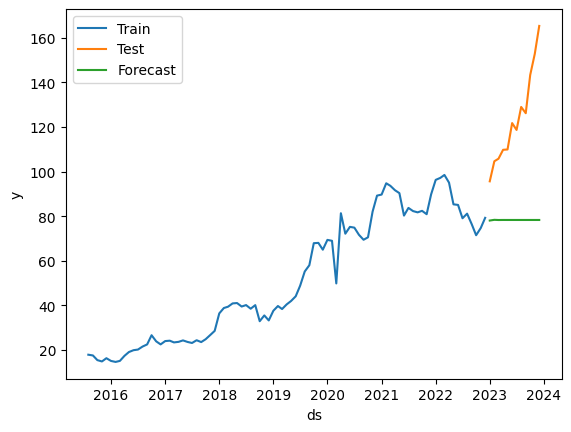

In [37]:
sns.lineplot(train[train['unique_id'] == 'Q.MX'], x="ds", y="y", label="Train")
sns.lineplot(test[test['unique_id'] == 'Q.MX'], x="ds", y="y", label="Test")
sns.lineplot(test_hat[test_hat.index == 'Q.MX'], x="ds", y="AutoARIMA", label="Forecast",)
plt.show()

In [38]:
arima_string(sf.fitted_[24,0].model_)

'ARIMA(0,1,0)                   '

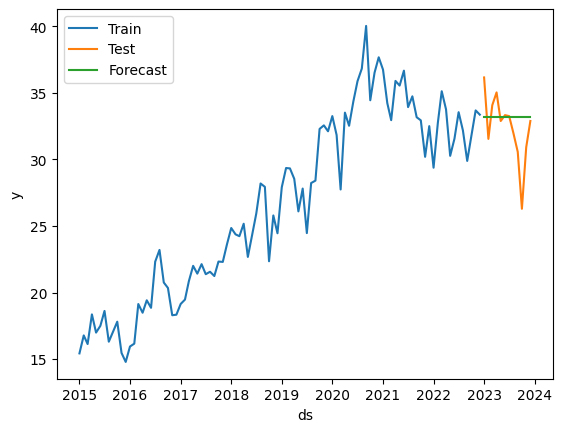

In [39]:
sns.lineplot(train[train['unique_id'] == 'BOLSAA.MX'], x="ds", y="y", label="Train")
sns.lineplot(test[test['unique_id'] == 'BOLSAA.MX'], x="ds", y="y", label="Test")
sns.lineplot(test_hat[test_hat.index == 'BOLSAA.MX'], x="ds", y="AutoARIMA", label="Forecast",)
plt.show()

In [40]:
arima_string(sf.fitted_[6,0].model_)

'ARIMA(2,2,1)                   '

### **Vector Autoregresivo**

In [41]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error

In [42]:
def preprocesar_datos(data, umbral_nulos=20):
    data_filtrada = data.loc[:, data.isnull().sum() <= umbral_nulos]

    data_imputada = data_filtrada.interpolate(method='linear').dropna()

    return data_imputada

In [43]:
data_preprocesada = preprocesar_datos(data_diff_cols)

In [44]:
def dividir_datos(data):
    train = data.loc[:'2022-12-31']
    test = data.loc['2023-01-01':]
    return train, test

In [45]:
train_data, test_data = dividir_datos(data_preprocesada)

In [46]:
model = VAR(train_data)
results = model.fit(ic='aic')

In [47]:
def calcular_mse_por_accion(results, train, test):

    forecast = results.forecast(train.values, steps=len(test))
    forecast_df = pd.DataFrame(forecast, index=test.index, columns=test.columns)

    mse_por_accion = {}
    for columna in test.columns:
        mse = mean_squared_error(test[columna], forecast_df[columna])
        mse_por_accion[columna] = mse

    return mse_por_accion, forecast_df

In [48]:
mse_resultados, forecast_df = calcular_mse_por_accion(results, train_data, test_data)

In [49]:
mse_df = pd.DataFrame.from_dict(mse_resultados, orient='index', columns=['VAR_MSE'])
mse_df.index.name = 'Acción'

In [50]:
print("Métricas de error cuadrático medio (MSE) por acción:")
mse_df

Métricas de error cuadrático medio (MSE) por acción:


,VAR_MSE
Acción,
AC.MX,2.057860e-10
ALFAA.MX,4.671424e-03
ALSEA.MX,4.468693e+02
AMXB.MX,4.976909e-04
ASURB.MX,1.615263e-03
BIMBOA.MX,7.839081e-10
BOLSAA.MX,5.616467e+01
CEMEXCPO.MX,2.893798e+00
CHDRAUIB.MX,3.416848e-07


In [51]:
def revertir_diferenciacion(predicciones, data_original, niveles_diferenciacion):

    predicciones_revertidas = predicciones.copy()
    for columna, nivel in niveles_diferenciacion.items():
        if columna not in data_original.columns:
            continue

        if nivel == 0:
            continue

        valores_base = data_original[columna].iloc[-nivel:]
        for _ in range(nivel):
            predicciones_revertidas[columna] = predicciones_revertidas[columna].cumsum() + valores_base.iloc[_]

    return predicciones_revertidas


In [52]:
def revertir_boxcox(predicciones, lambdas):

    predicciones_revertidas = predicciones.copy()
    for columna, lambda_val in lambdas.items():
        if columna not in predicciones.columns:
            continue

        if lambda_val is None:
            continue

        if lambda_val == 0:
            predicciones_revertidas[columna] = np.exp(predicciones_revertidas[columna])
        else:
            predicciones_revertidas[columna] = (predicciones_revertidas[columna] * lambda_val + 1) ** (1 / lambda_val)

    return predicciones_revertidas


In [53]:
predicciones_revertidas_dif = revertir_diferenciacion(forecast_df, train_data, niveles_diferenciacion)

In [54]:
predicciones_finales = revertir_boxcox(predicciones_revertidas_dif, lambdas)

In [55]:
print("Predicciones en la escala original:")
predicciones_finales

Predicciones en la escala original:


Ticker,AC.MX,ALFAA.MX,ALSEA.MX,AMXB.MX,ASURB.MX,BIMBOA.MX,BOLSAA.MX,CEMEXCPO.MX,CHDRAUIB.MX,FEMSAUBD.MX,...,MEGACPO.MX,OMAB.MX,ORBIA.MX,PE&OLES.MX,PINFRA.MX,Q.MX,RA.MX,TLEVISACPO.MX,VESTA.MX,WALMEX.MX
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-01,1.000014,0.958040,NaN,0.998845,0.965125,1.000036,NaN,8.086827,0.997795,0.972541,...,-1.452396,0.981176,0.972022,1.006353,141.491146,1.196118,0.994134,0.337778,1.000575,0.709526
2023-02-01,1.000000,0.951677,NaN,1.002947,0.969634,1.000009,3.255333,8.071256,0.994752,0.940306,...,-0.945862,0.983850,0.959258,0.998741,139.636375,1.353924,0.933532,0.215001,1.000721,0.694903
2023-03-01,1.000001,0.934780,NaN,0.998395,0.970343,1.000020,3.374992,8.157800,0.992814,0.923560,...,-1.548810,0.982758,0.955238,1.000459,140.369386,1.362798,0.945998,0.138617,1.000815,0.691787
2023-04-01,1.000002,0.913975,NaN,0.994504,0.972871,1.000043,3.316758,7.993735,0.990285,0.916196,...,-1.596151,0.985363,0.947902,1.001306,139.757465,1.419202,0.920771,0.102814,1.000867,0.676472
2023-05-01,1.000011,0.931645,NaN,0.997086,0.978120,1.000054,4.624389,8.229836,0.987995,0.917748,...,-1.648885,0.988855,0.957914,1.005450,141.100805,1.557190,0.952869,0.099359,1.001239,0.730992
2023-06-01,1.000014,0.921113,NaN,0.996999,0.983240,1.000056,5.330693,8.333249,0.985484,0.912119,...,-2.282631,0.992741,0.957742,1.007079,141.939028,1.603243,0.971733,0.071900,1.001313,0.710025
2023-07-01,1.000016,0.904405,NaN,0.996928,0.986416,1.000064,5.688799,8.459402,0.983159,0.907318,...,-2.412395,0.994140,0.956270,1.009118,141.200587,1.655637,0.978719,0.056183,1.001503,0.732042
2023-08-01,1.000019,0.895921,NaN,0.997462,0.989470,1.000078,6.125507,8.593774,0.980783,0.907357,...,-2.617448,0.996196,0.956086,1.010422,141.555284,1.745576,0.991837,0.041334,1.001687,0.742449
2023-09-01,1.000022,0.890693,NaN,0.998360,0.992837,1.000085,6.707472,8.725297,0.978420,0.905541,...,-2.974893,0.998533,0.959637,1.012503,141.818673,1.835651,1.007441,0.029732,1.001855,0.755126


In [56]:
def graficar_predicciones_vs_reales(nombre_accion, predicciones, reales):
    """
    Grafica las predicciones frente a los valores reales para una acción específica.

    Args:
        nombre_accion (str): Nombre de la acción a graficar.
        predicciones (pd.DataFrame): DataFrame con las predicciones en la escala original.
        reales (pd.DataFrame): DataFrame con los valores reales en la escala original.
    """
    if nombre_accion not in predicciones.columns or nombre_accion not in reales.columns:
        print(f"La acción '{nombre_accion}' no se encuentra en los DataFrames proporcionados.")
        return

    plt.figure(figsize=(12, 6))
    plt.plot(reales.index, reales[nombre_accion], label='Valores Reales', marker='o')
    plt.plot(predicciones.index, predicciones[nombre_accion], label='Predicciones', linestyle='--', marker='x')

    plt.title(f"Predicciones vs Valores Reales para {nombre_accion}")
    plt.xlabel("Fecha")
    plt.ylabel("Valor")
    plt.legend()
    plt.grid(True)
    plt.show()

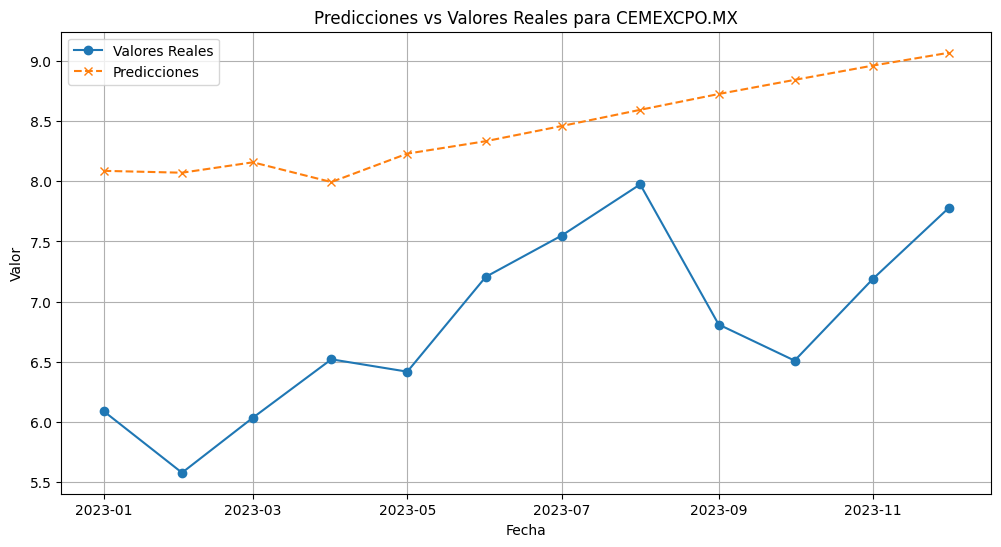

In [57]:
nombre_accion = 'CEMEXCPO.MX'  # Sustituir por el nombre de la acción deseada
graficar_predicciones_vs_reales(nombre_accion, predicciones_finales, test_data)

## **AutoETS**





In [58]:
from statsforecast.models import AutoETS
from statsforecast import StatsForecast
from statsmodels.tsa.seasonal import seasonal_decompose

In [59]:
train_df = df_diff[df_diff['ds'] <= '2022-12-01']
test_df = df_diff[df_diff['ds'] >= '2023-01-01']

In [60]:
season_length = 12

In [61]:
horizon = len(test_df['ds'].unique())

In [62]:
models = [AutoETS(season_length=season_length, model='ZZZ')]

In [63]:
sf = StatsForecast(models=models, freq='MS', n_jobs=-1)

In [64]:
sf.fit(train_df)

StatsForecast(models=[AutoETS])

In [65]:
forecast = sf.predict(horizon)

c:\Users\esteb\.conda\envs\ITESO_1\lib\site-packages\statsforecast\core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [66]:
print("Predicciones:")
print(forecast)

Predicciones:
                  ds       AutoETS
unique_id                         
AC.MX     2023-01-01  4.516472e-07
AC.MX     2023-02-01  7.113559e-08
AC.MX     2023-03-01 -2.332737e-07
AC.MX     2023-04-01 -4.768011e-07
AC.MX     2023-05-01 -6.716230e-07
...              ...           ...
WALMEX.MX 2023-08-01 -1.735129e-02
WALMEX.MX 2023-09-01 -1.738101e-02
WALMEX.MX 2023-10-01 -1.740477e-02
WALMEX.MX 2023-11-01 -1.742379e-02
WALMEX.MX 2023-12-01 -1.743900e-02

[420 rows x 2 columns]


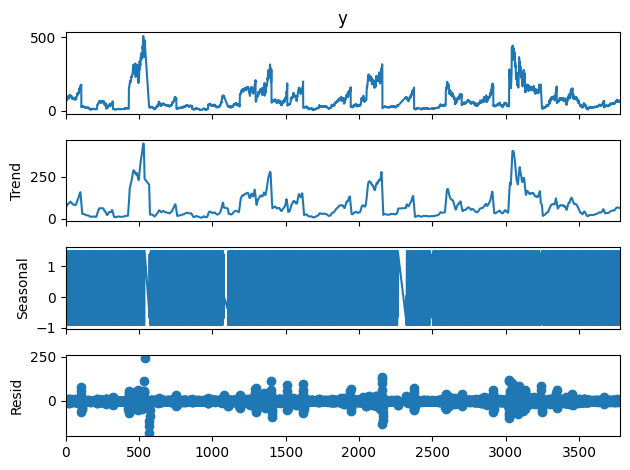

In [67]:
a = seasonal_decompose(df["y"], model="add", period=12)
a.plot();

In [68]:
train = df[df.ds < '2023-01-01']
test = df[df.ds >= '2023-01-01']

season_length = 12
horizon = len(test['ds'].unique())
models = [AutoETS(season_length=season_length, model='ZZZ')]

sf = StatsForecast(models=models, freq='MS', n_jobs=-1)

sf.fit(train)

test_hat = sf.predict(h=horizon)

c:\Users\esteb\.conda\envs\ITESO_1\lib\site-packages\statsforecast\core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [69]:
# Evaluar el modelo
def model_evaluation(y_true, y_pred, stocks):
    errors_df = pd.DataFrame(columns=['MSE'], index=stocks)

    def mean_squared_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        if len(y_true) == 0 or len(y_pred) == 0:
            return np.nan
        return np.mean((y_true - y_pred) ** 2)

    for stock in stocks:
        y_true_stock = y_true[y_true['unique_id'] == stock]['y']

        if stock not in y_pred['unique_id'].unique():
            print(f"Sin predicciones para {stock}")
            errors_df.loc[stock, 'MSE'] = np.nan
            continue

        y_pred_stock = y_pred[y_pred['unique_id'] == stock]['AutoETS']

        mse_score = mean_squared_error(y_true_stock, y_pred_stock)
        print(f"MSE score para {stock}: {mse_score}")

        errors_df.loc[stock, 'MSE'] = mse_score

    return errors_df


In [70]:
test_hat.reset_index(inplace=True)

errors_df = model_evaluation(test, test_hat, test['unique_id'].unique())

MSE score para AC.MX: 242.33278573337734
MSE score para ALFAA.MX: 0.9739621532522497
MSE score para ALSEA.MX: 357.2988220822367
MSE score para AMXB.MX: 2.823071979101338
MSE score para ASURB.MX: 2532.091663351501
MSE score para BBAJIOO.MX: 25.302380471728824
MSE score para BIMBOA.MX: 69.90663596976007
MSE score para BOLSAA.MX: 15.507731806744813
MSE score para CEMEXCPO.MX: 13.63626606455766
MSE score para CHDRAUIB.MX: 290.3977695388847
MSE score para CUERVO.MX: 31.739543490323896
MSE score para FEMSAUBD.MX: 1623.809850141731
MSE score para GAPB.MX: 1382.979014652955
MSE score para GCARSOA1.MX: 2351.285132705837
MSE score para GCC.MX: 521.4932188458642
MSE score para GENTERA.MX: 2.72143781473584
MSE score para GFINBURO.MX: 53.000096342136025
MSE score para GFNORTEO.MX: 516.4075196785952
MSE score para GMEXICOB.MX: 243.13384999277932
MSE score para GRUMAB.MX: 1483.6126851894962
MSE score para KIMBERA.MX: 25.963415071179796
MSE score para KOFUBL.MX: 253.15769234605636
MSE score para LABB.

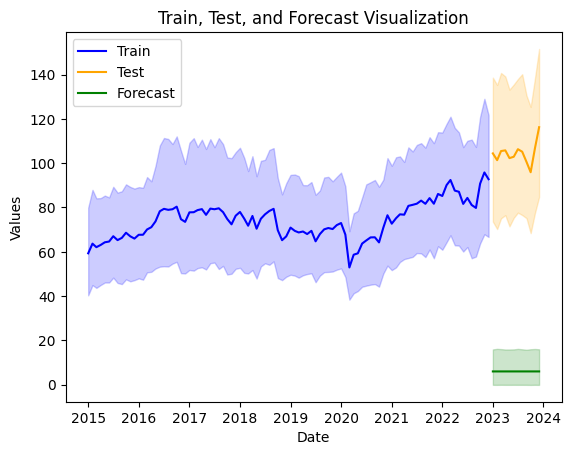

In [71]:
sns.lineplot(data=train, x="ds", y="y", label="Train", color="blue")

sns.lineplot(data=test, x="ds", y="y", label="Test", color="orange")

sns.lineplot(data=forecast, x="ds", y="AutoETS", label="Forecast", color="green")

plt.title("Train, Test, and Forecast Visualization")
plt.xlabel("Date")
plt.ylabel("Values")
plt.legend()
plt.show()

In [72]:
sf.fitted_[24,0].model_['method']

'ETS(A,N,N)'

### **Regresión Dinámica**

In [73]:
df = df_diff.copy()

In [74]:
# Configurar y ajustar el modelo
models = [AutoARIMA(season_length=12)]
sf = StatsForecast(df=train, models=models, freq='MS', n_jobs=-1)
sf.fit()

c:\Users\esteb\.conda\envs\ITESO_1\lib\site-packages\statsforecast\core.py:476: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(
c:\Users\esteb\.conda\envs\ITESO_1\lib\site-packages\statsforecast\core.py:476: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(


StatsForecast(models=[AutoARIMA])

In [75]:
# Pronosticar para el futuro
forecast_horizon = len(test['ds'].unique())
forecast_future = sf.forecast(forecast_horizon)

c:\Users\esteb\.conda\envs\ITESO_1\lib\site-packages\statsforecast\core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [76]:
# Inspeccionar resultados
print("Estructura de forecast_future:")
print(forecast_future.head())   

Estructura de forecast_future:
                  ds   AutoARIMA
unique_id                       
AC.MX     2023-01-01  147.468277
AC.MX     2023-02-01  147.468277
AC.MX     2023-03-01  147.468277
AC.MX     2023-04-01  147.468277
AC.MX     2023-05-01  147.468277


In [77]:
# Evaluar resultados
unique_ids = train['unique_id'].unique()
metricas = {}

for i, unique_id in enumerate(unique_ids):
    # Filtrar valores reales y predichos
    real = test[test['unique_id'] == unique_id]['y'].reset_index(drop=True)
    pred = forecast_future.iloc[i::len(unique_ids), :]['AutoARIMA'].reset_index(drop=True)
    
    # Calcular MSE
    mse = mean_squared_error(real, pred)
    metricas[unique_id] = mse
    print(f"MSE para {unique_id}: {mse:.4f}")

MSE para AC.MX: 8708.3900
MSE para ALFAA.MX: 7757.2966
MSE para ALSEA.MX: 3779.3214
MSE para AMXB.MX: 7493.3330
MSE para ASURB.MX: 127631.9273
MSE para BBAJIOO.MX: 6308.7666
MSE para BIMBOA.MX: 4462.0894
MSE para BOLSAA.MX: 8360.2024
MSE para CEMEXCPO.MX: 12379.3133
MSE para CHDRAUIB.MX: 4617.6366
MSE para CUERVO.MX: 6577.9668
MSE para FEMSAUBD.MX: 12235.4591
MSE para GAPB.MX: 42546.4550
MSE para GCARSOA1.MX: 15816.2978
MSE para GCC.MX: 16536.0034
MSE para GENTERA.MX: 19980.3458
MSE para GFINBURO.MX: 13520.2422
MSE para GFNORTEO.MX: 13324.2225
MSE para GMEXICOB.MX: 13596.4860
MSE para GRUMAB.MX: 48772.9673
MSE para KIMBERA.MX: 16610.5108
MSE para KOFUBL.MX: 16750.2981
MSE para LABB.MX: 24310.4390
MSE para LACOMERUBC.MX: 20005.3543
MSE para LIVEPOLC-1.MX: 14611.9076
MSE para MEGACPO.MX: 8170.4371
MSE para OMAB.MX: 13913.3250
MSE para ORBIA.MX: 9292.3238
MSE para PE&OLES.MX: 29748.2858
MSE para PINFRA.MX: 10423.5478
MSE para Q.MX: 5258.6048
MSE para RA.MX: 5868.6062
MSE para TLEVISACPO.M

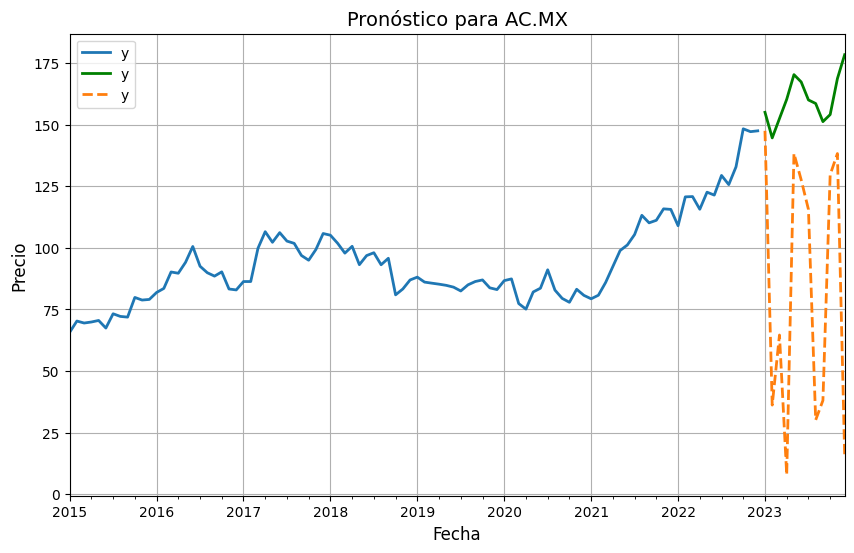

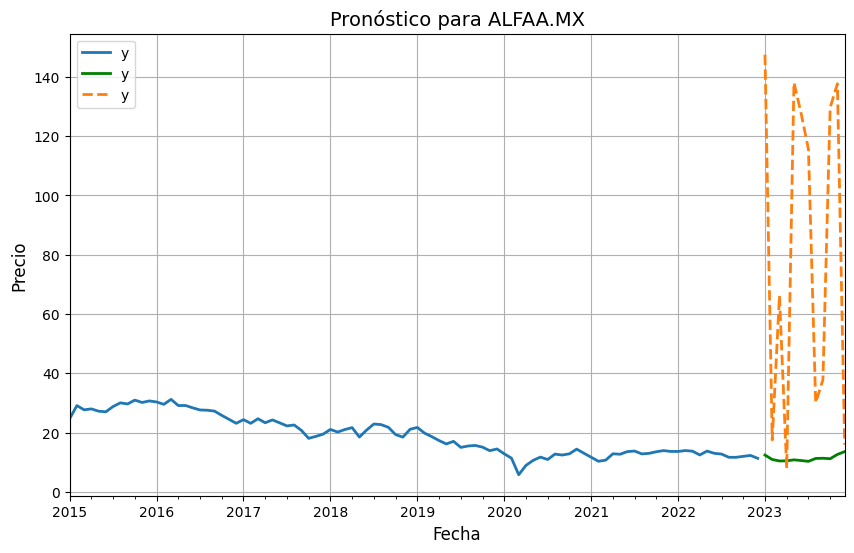

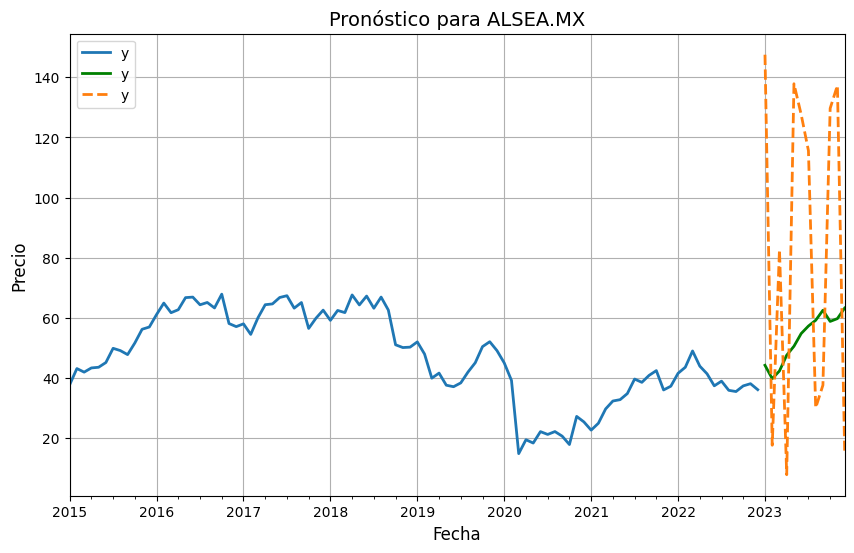

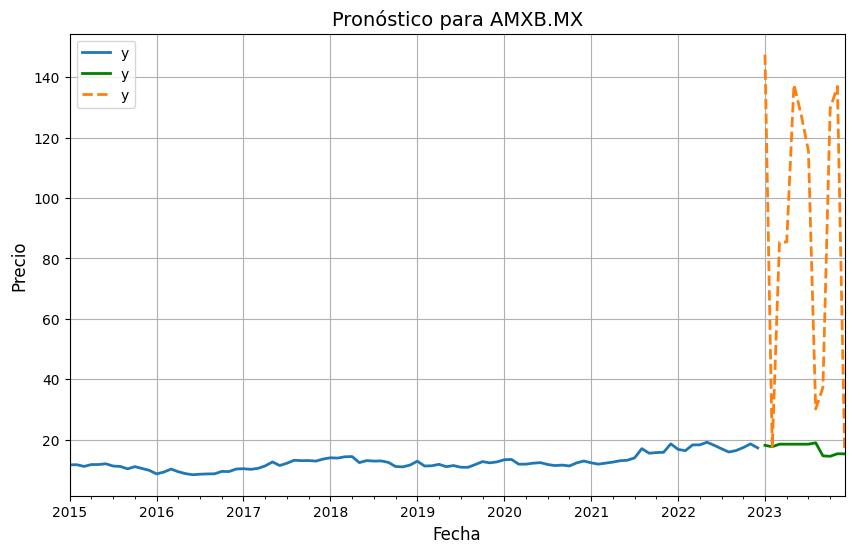

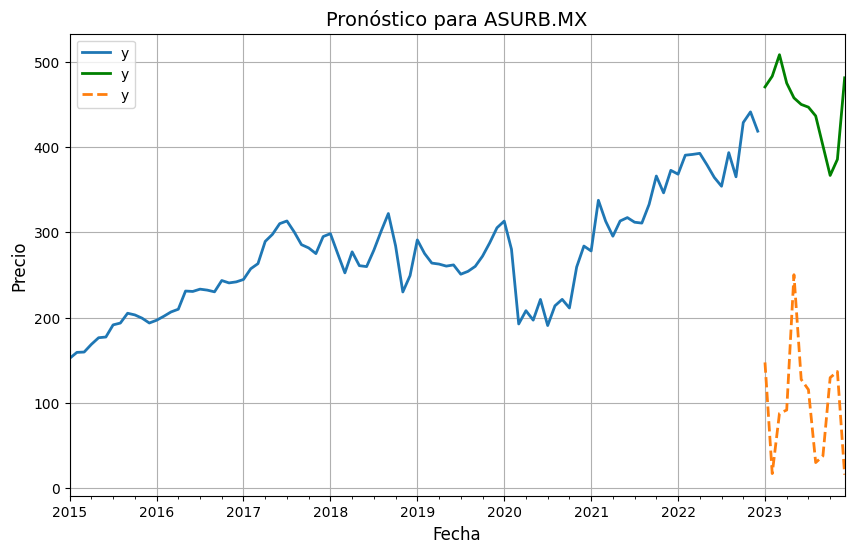

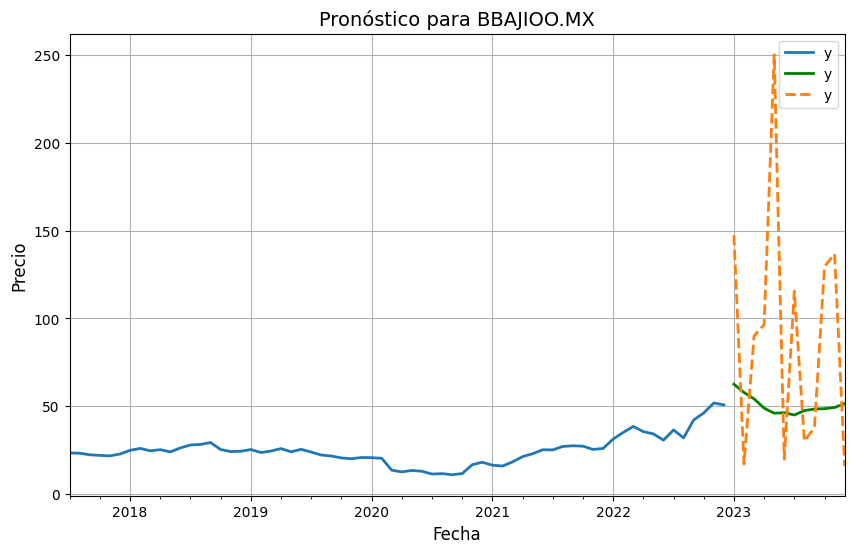

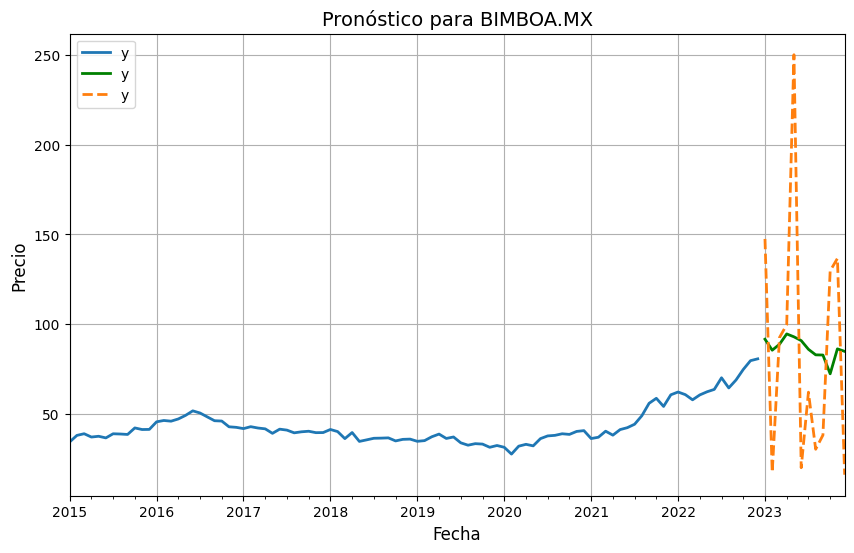

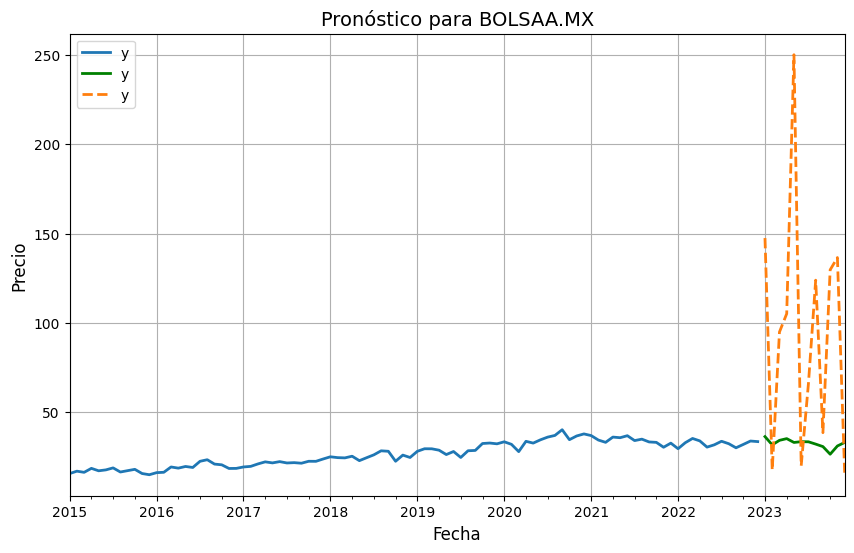

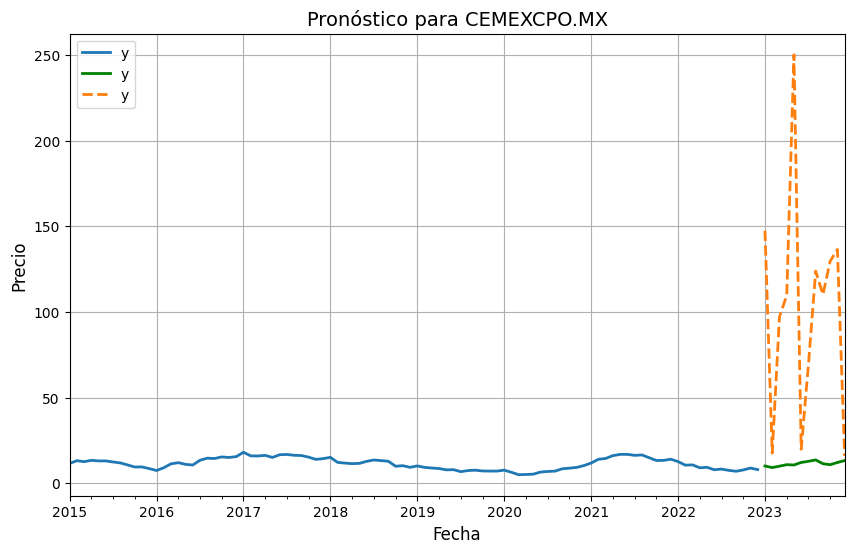

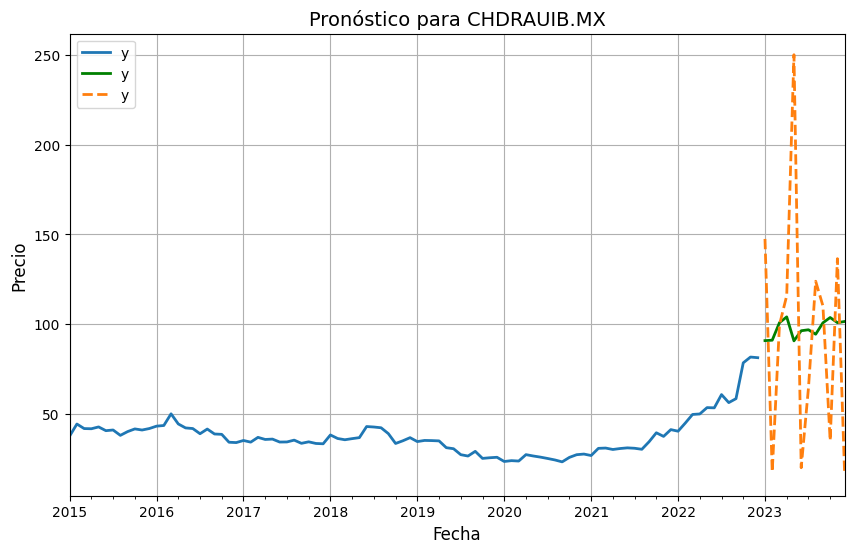

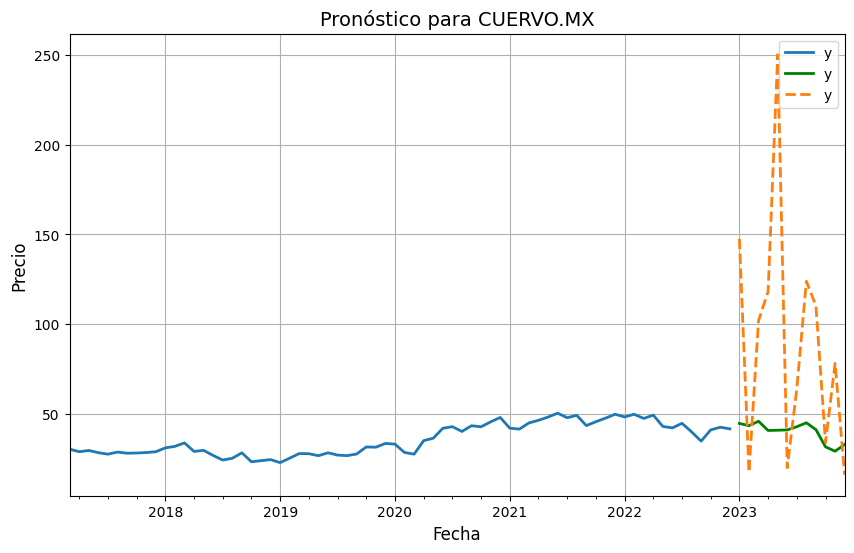

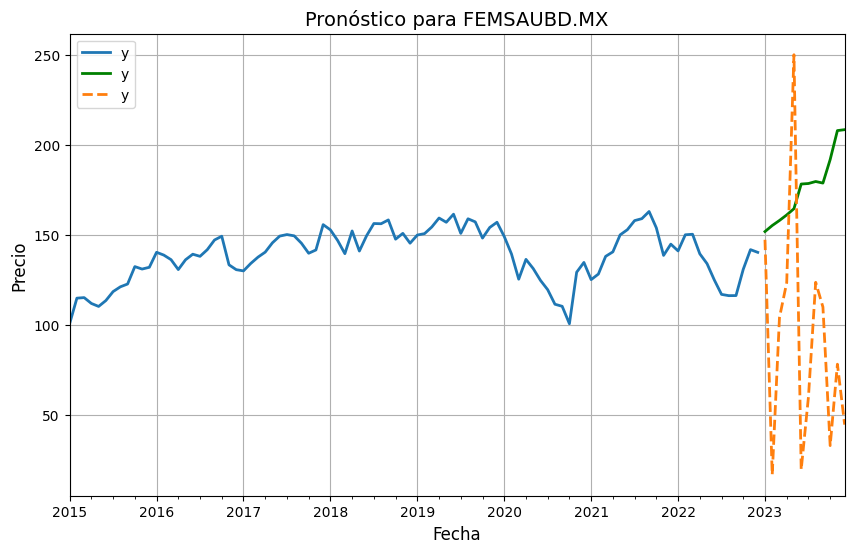

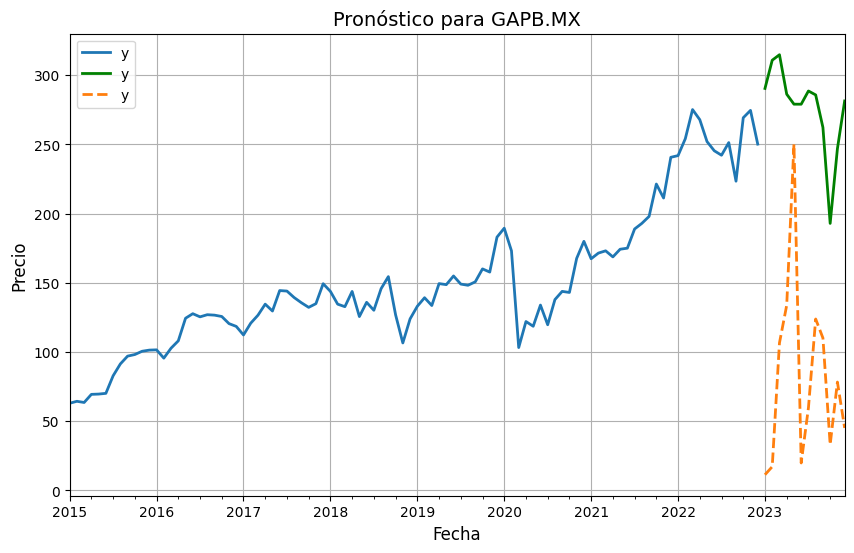

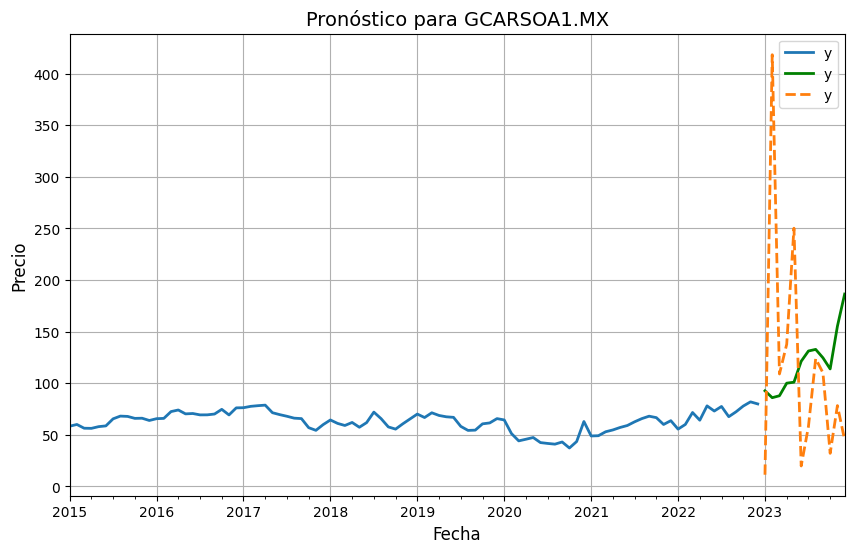

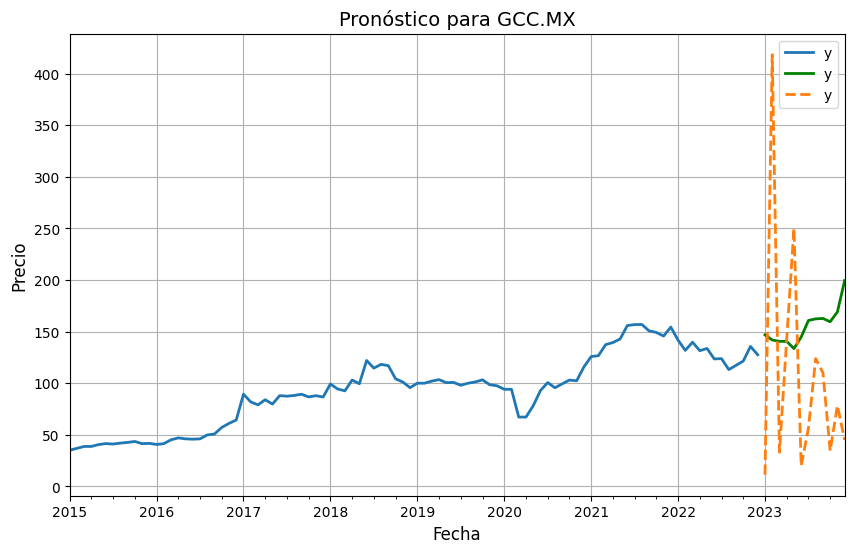

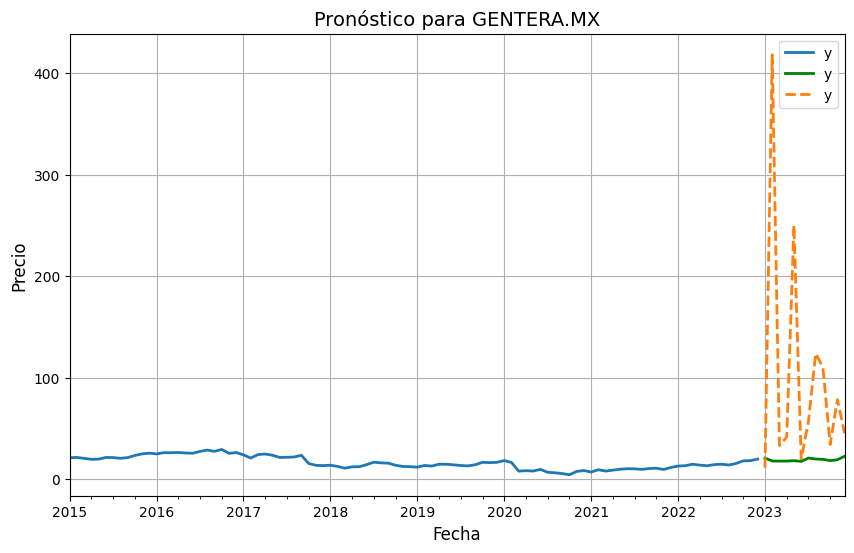

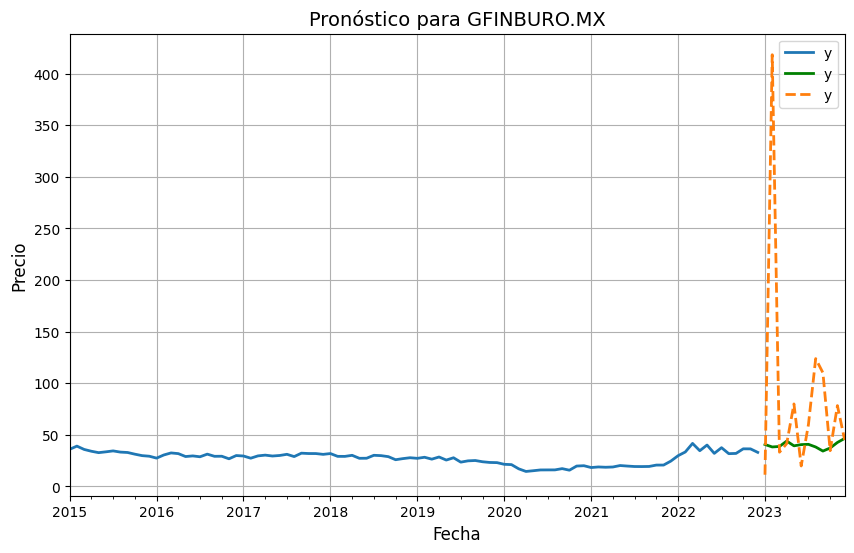

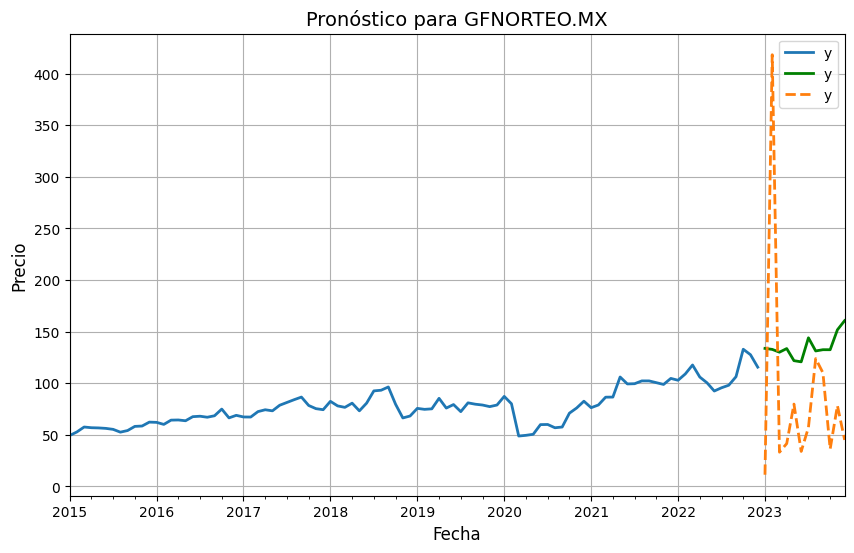

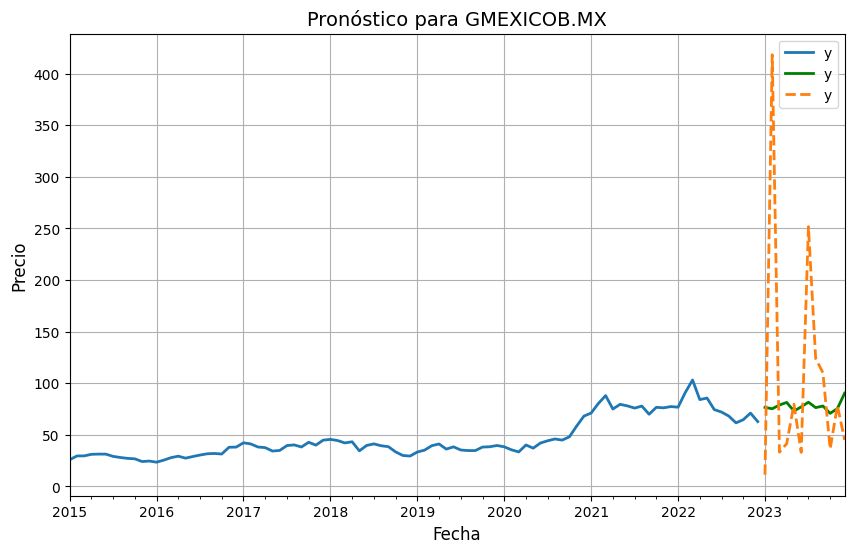

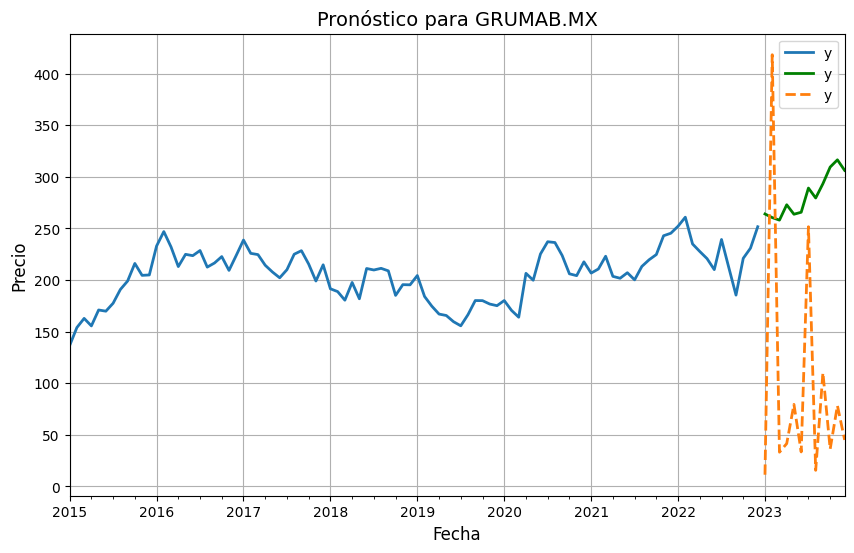

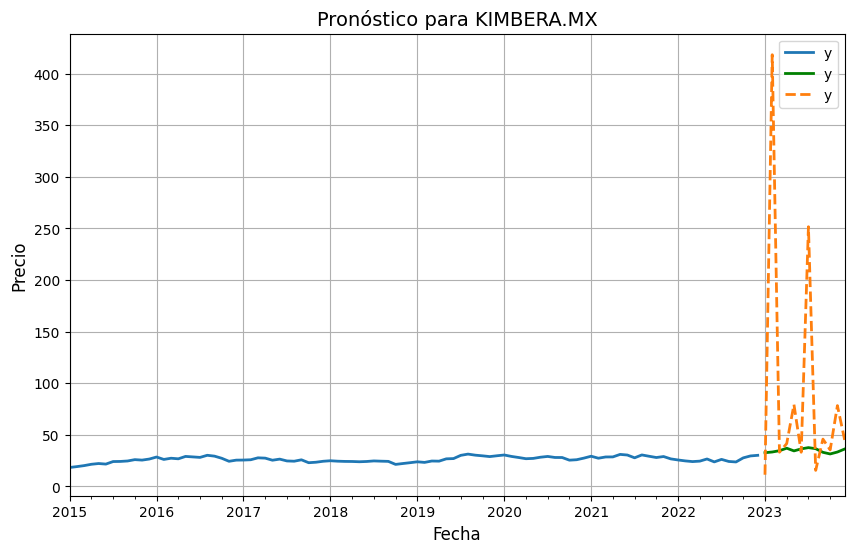

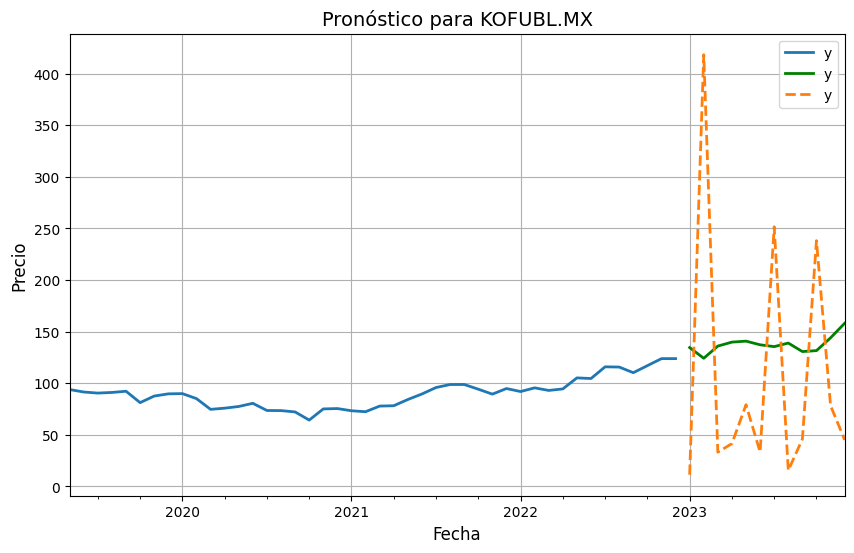

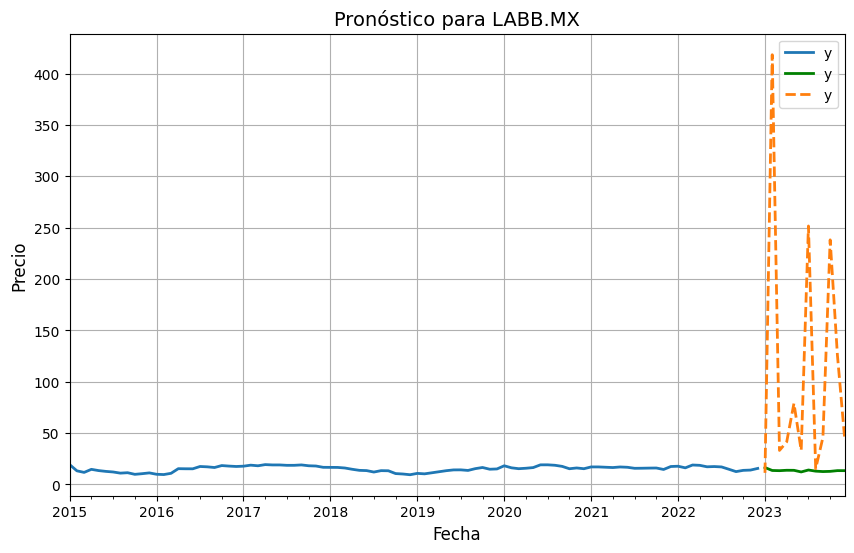

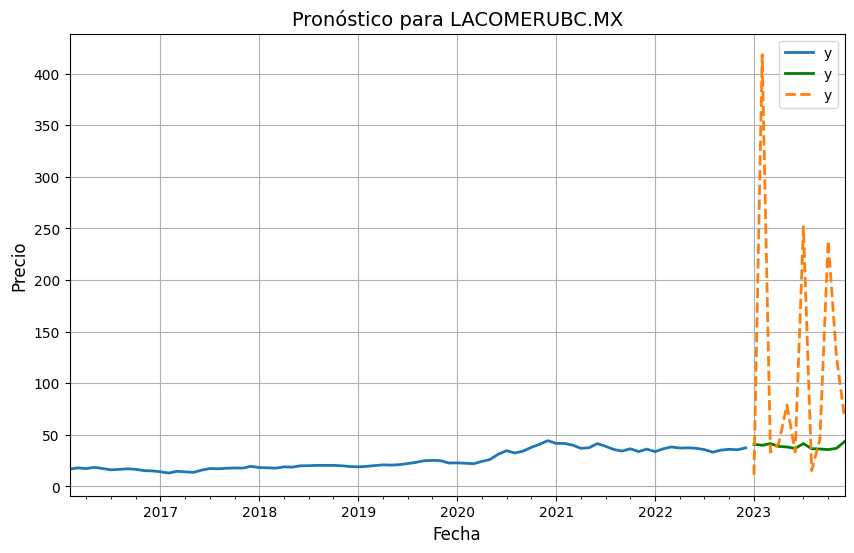

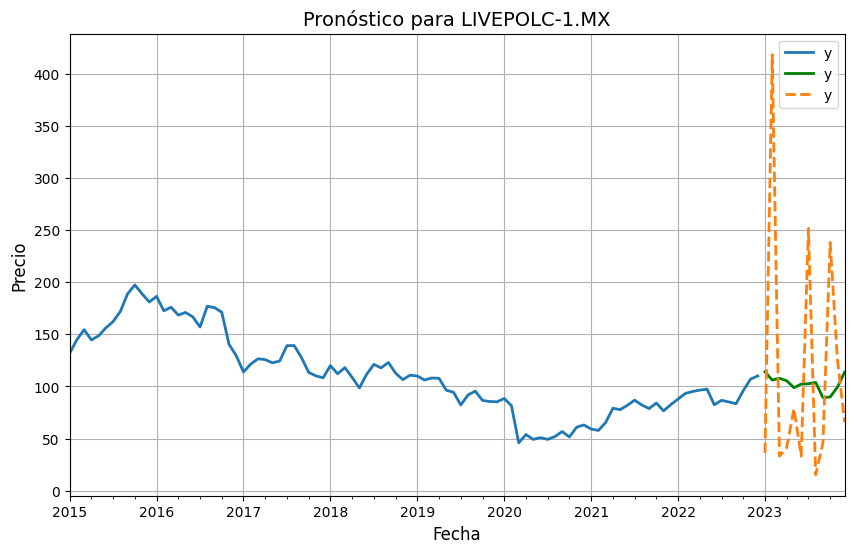

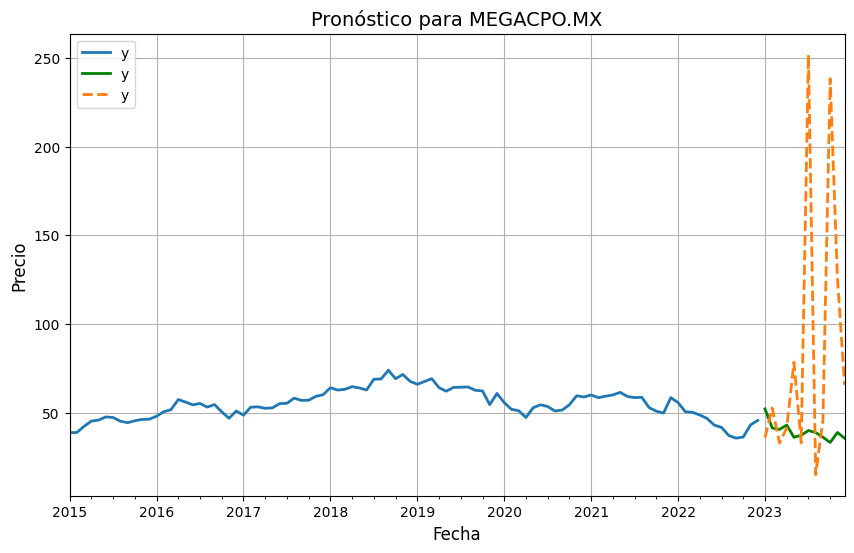

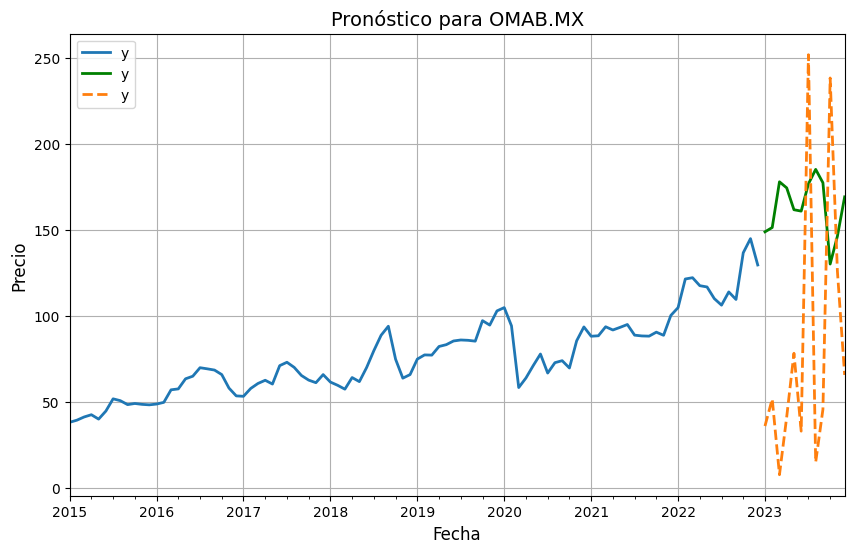

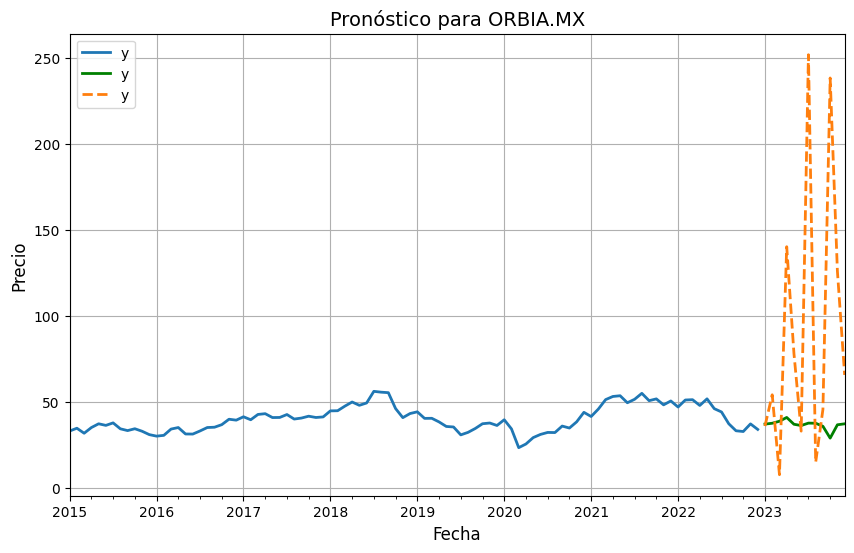

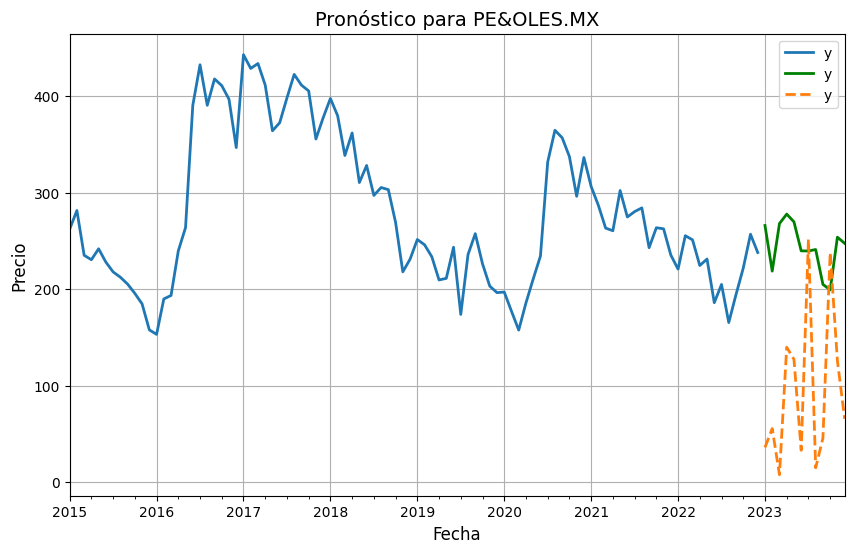

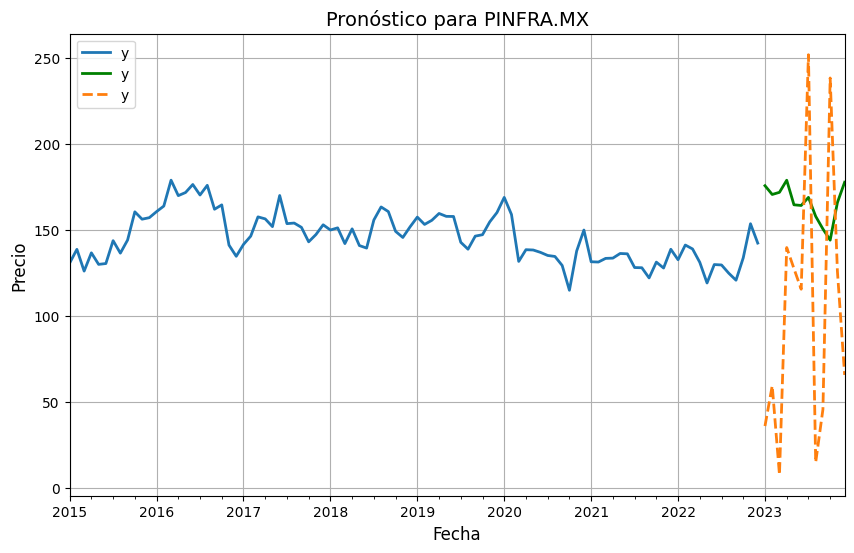

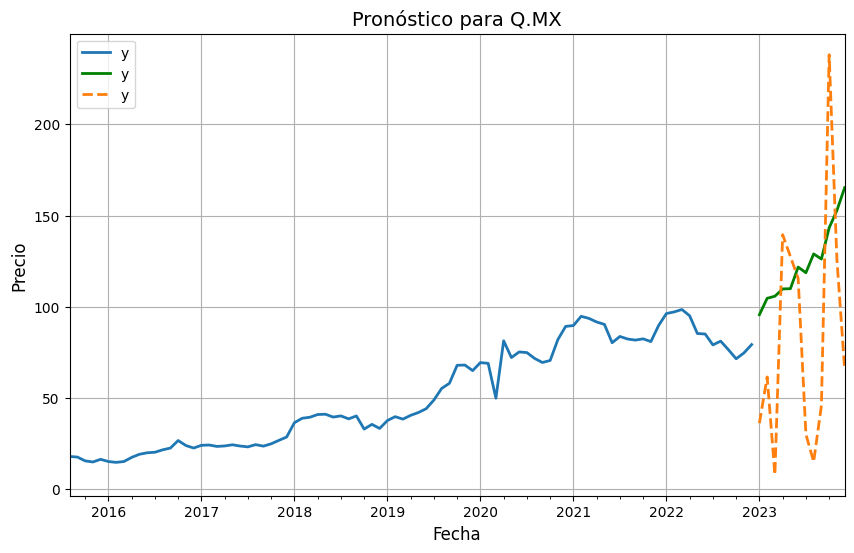

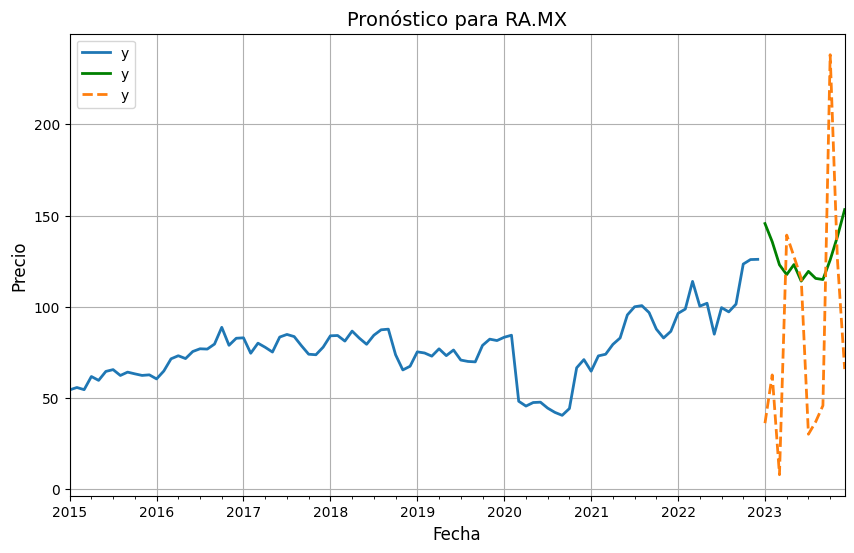

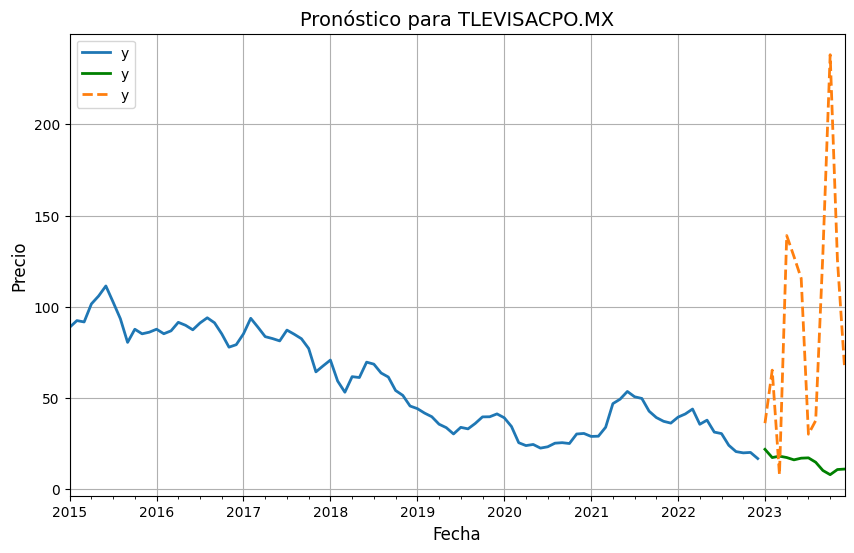

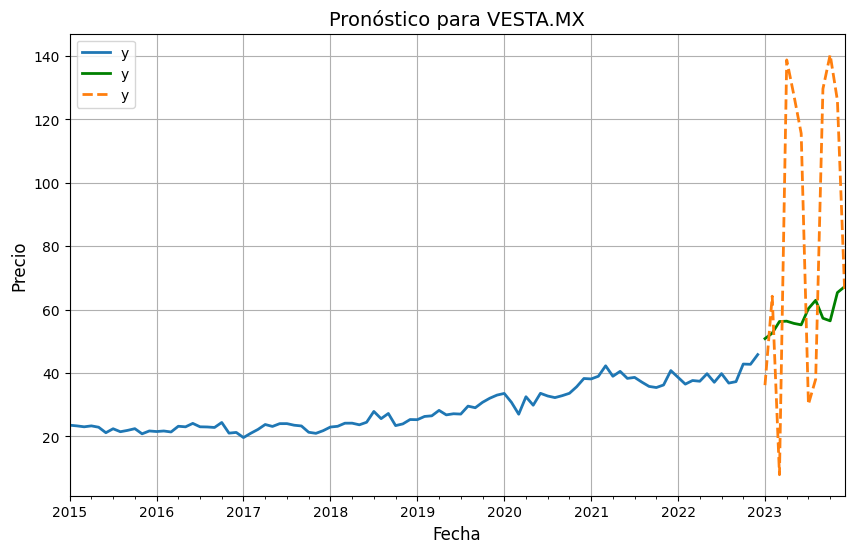

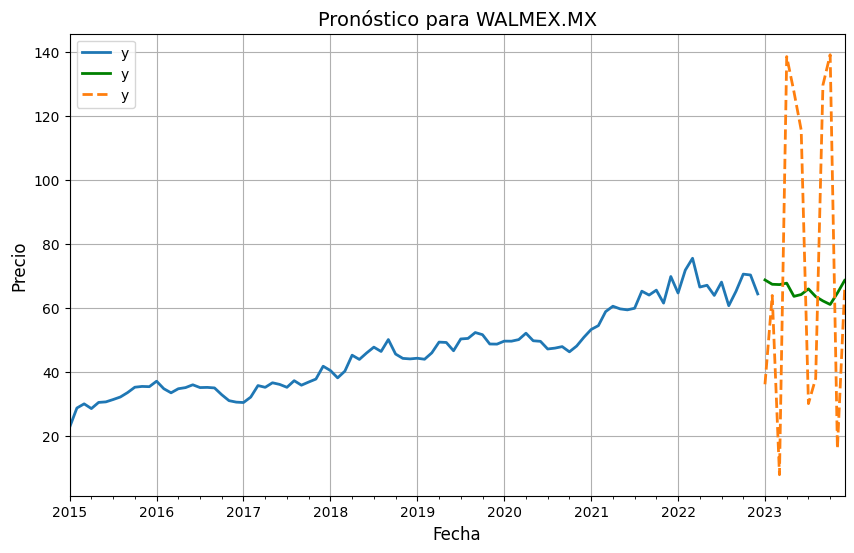

In [78]:
# Graficar resultados
for i, unique_id in enumerate(unique_ids):
    # Datos de entrenamiento, prueba y futuro
    train_action = train[train['unique_id'] == unique_id]
    test_action = test[test['unique_id'] == unique_id]
    pred = forecast_future.iloc[i::len(unique_ids), :]['AutoARIMA'].reset_index(drop=True)
    
    # Crear DataFrame para predicción
    forecast_action = pd.DataFrame({'ds': test_action['ds'].values, 'y': pred})
    
    # Graficar
    _, ax = plt.subplots(1, 1, figsize=(10, 6))
    train_action[['ds', 'y']].set_index('ds').plot(ax=ax, label='Entrenamiento', linewidth=2)
    test_action[['ds', 'y']].set_index('ds').plot(ax=ax, label='Prueba', linewidth=2, color='green')
    forecast_action.set_index('ds').plot(ax=ax, label='Pronóstico', linestyle='--', linewidth=2)
    ax.set_title(f'Pronóstico para {unique_id}', fontsize=14)
    ax.set_ylabel('Precio', fontsize=12)
    ax.set_xlabel('Fecha', fontsize=12)
    ax.legend(prop={'size': 10})
    ax.grid(True)
    plt.show()

## **Conclusión**

En este proyecto, abordamos el análisis del comportamiento de un portafolio compuesto por 35 acciones mediante técnicas avanzadas de modelado de series temporales. Inicialmente, aplicamos transformaciones Box-Cox y diferenciaciones para garantizar que las series cumplieran con los supuestos de estacionariedad y normalidad, validados con las pruebas de Shapiro-Wilk y Dickey-Fuller aumentada.  

Se implementaron y compararon cinco enfoques: Seasonal Naive, ARIMA, AutoETS, Regresión Dinámica y Vector Autorregresivo (VAR). Cada modelo fue evaluado utilizando el Error Cuadrático Medio (MSE) y análisis gráficos, lo que permitió identificar al modelo **AutoETS** como el más adecuado para el pronóstico de este portafolio.  

El modelo **AutoETS** destacó por su capacidad para capturar patrones estacionales y de tendencia en las series, mostrando el menor MSE y un ajuste superior en las gráficas comparativas. Este resultado valida su aplicabilidad como herramienta clave para la proyección de rendimientos y la toma de decisiones en un contexto financiero.  

Con este análisis, logramos una comprensión profunda de la dinámica del portafolio, estableciendo una base sólida para futuros estudios y estrategias basadas en datos.